## Pattern Recognition and Machine Learning
## Assignment 3 Part C
### Bird Image Classification with CNN
### Alan Gaugler, U885853


# Introduction

This project is the identification of bird species from images of birds captured in their natural habitat using pattern recognition and machine learning (PRML) algorithms. The models will be trained to classify several hundred species of birds. Images of birds captured by cameras or smartphones can be uploaded and identified by the algorithms.

The accurate identification of species is important for all forms of biological, ecological and evolutionary research [1]. Many research projects require accurate identification of species including: population monitoring of endangered species, studying biodiversity of environmental habitats and the impact of climate change, habitat loss and deforestation on species distribution and migration patterns. Additionally, bird watching is a popular pastime for many amateurs and accurately identifying new species from field guides can be an arduous task, especially when travelling to new regions with different species.

With the vast number of digital images available online today taken from cameras and smartphones, there is an abundance of images of all bird species that can be used in datasets to train PRML algorithms to classify bird species. With the advancement of PRML algorithms, it can be faster and more accurate to identify bird species through the use of applications utilising properly trained PRML models than by manual methods [2]. Two of the most important criteria for image classification is the selection of a good dataset and the machine learning algorithm.


# Adopted Computational Approach

The problem of this project is accurately identifying species of birds from images. There are over 11,000 species of birds in the world today [3]. With such a large number of species it can be a difficult task for humans to identify all the species they see and capture in photos. Many datasets of bird images used in PRML can contain tens of thousands of images of several hundred species of birds or more. This is a large number of labels for the algorithm to classify, making it a complex task. To add to the complexity, the captured images of the birds could be taken from various angles with the birds in several environments and positions such standing, flying, lying or swimming. Additionally, some images may have the bird covering only a small percentage of the entire image, making it more complex for the algorithm to identify the bird and its species.
The goal of the project is to identify species of birds from images of them in their natural habitat. Two of the most important criteria for image classification is the selection of a good dataset and the machine learning algorithm. 

## Dataset

The project that was decided was to create models to identify bird species based on photos of those birds. The most comprehensive dataset on bird images found is “BIRDS 400 - SPECIES IMAGE CLASSIFICATION” on Kaggle [4]. It consists of 400 bird species and contains a total of 58388 training images, 2000 test images and 2000 validation images (5 per species). Due to processing power and time constraints, the dataset for this project was reduced down to 10 species. The total number of images used in the training set was 1475, giving a mean of 147.5 per species, ranging from a minimum of 131 to a maximum of 170.

The images are full colour consisting of a width of 224 pixels and a height of 224 pixels giving a total resolution of 150528 pixels. It was ensured that all images consisted of one bird only that took up at least 50% of the image area.

The reduced dataset was closely examined to ensure all images were correct. 85% of images were male and 15% female. In many species, their plumage is very different and so it was decided not to use these species in the final dataset as this would lead to higher errors in predicting these classifications. Additionally, there were several examples of miscl assified species in the dataset and so those images were removed. In total 3.7% of images were removed due to the above reasons. In many species, this result in the removal of several images. It was desired to have at least 130 images per species and so if there were fewer, additional images were obtained online and they were cropped and resized to ensure that the image was in the right format of 224 x 224 pixels with at least 50% of the area taken by the bird.

## Evaluation of Algorithms

For the bird species dataset, a test run on 5 common machine learning models was carried out in using sklearn on a subset of 5 bird species. The data was split into 80% training and 20% test. Figure 2 below shows the accuracy score of the models on the dataset. Out of the 5 models, the SVM (Support Vector Machine), Random Forest Classifier, and Logistic regression algorithms performed more accurately at classifying the bird species with accuracy scores of 81.25%, 80.20%, and 77.60%, respectively. On the other hand, MPL or Multilayer Perceptron Classifier and Decision Tree Classifier performed poorly on this dataset set and their accuracy scores were below 60%. It was decided to use the two best of these algorithms for this project.

The plot above confirms the SVC, Random Forest and Logistic Regression models have much higher accuracy than the MLP and Logistic Regression models.
A model that was not evaluated in the sklearn evaluation but has been widely used in image classification of wildlife with high success is a Convolutional Neural Network (CNN) [5]. Many research papers have lauded this model for its high accuracy in image classification. 
To summarise, it was decided to use the Random Forest Classifier and SVM classifier from Scikit-learn and also Tensorflow’s CNN algorithm in the classification of the bird species.





We would like to acknowledge that to understand a few complex coding structures, we have used different sources from the internet  such as Breast Cancer Classification Using Support Vector Machine (SVM) by Adebola Lamidi [6], Breast Cancer Wisconsin [Diagnostic] - EDA by Shubam Sumbria [7] and Bird Species Classification by Kathiresh Praveen[8], 400 bird species CNN by June Hou[9] and The provided CNN Tutorial in the PRML unit by Prof Dharmendra Sharma, University of Canberra, 2022 [2].



First the required modules for this project are imported. 

In [1]:
# Import packages that will be used in this project.
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

from skimage.io import imread, imshow

from pathlib import Path
from glob import glob
import os

import seaborn as sns

# Import the required modules.
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import preprocessing

import time
import random

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras




from sklearn.model_selection import cross_val_score,KFold

## Import Dataset from Google Drive

In [3]:
# Alan's Drive
from google.colab import drive
drive.mount("/content/gdrive")
location = './gdrive/My Drive/PRML/Datasets/Birds 10/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
os.getcwd()

'/content'

The dataset will be loaded into a data frame and observed.

In [5]:
name_of_birds  = [value.name for value in Path(location+'/train').glob("*")]
name_of_dataset = [value.name for value in Path(location).glob("*")]
print(name_of_dataset)
print(name_of_birds)

['birds_10.csv', 'train', 'valid', 'test']
['COCKATOO', 'GANG GANG COCKATOO', 'OSPREY', 'EMU', 'KOOKABURRA', 'BUSH TURKEY', 'RAINBOW LORIKEET', 'REGENT BOWERBIRD', 'BLACK SWAN', 'SPOTTED CATBIRD']


**Load Train, Test and Validation Images**

Most of the images have been stored in the train folder. These images will be split into the training and test sets. The validation folder contains 5 images of each species which will be used to validate the accuracy of the final model on independant data to that used in the modelling process.

In [6]:
# This list will map the target classification with the species' name
bird_list = ['BLACK SWAN', 'BUSH TURKEY', 'COCKATOO', 'EMU', 'GANG GANG COCKATOO', 'KOOKABURRA', 
             'OSPREY', 'RAINBOW LORIKEET', 'REGENT BOWERBIRD', 'SPOTTED CATBIRD']


# Create lists to be uploaded from the dataset.
images = []
target_lbl = []
target_idx = []
validation_images = []
validation_target_lbl = []
validation_target_idx = []
idx = 0
vld_idx = 0

# Import the training and independant validation datasets.
for f_name in name_of_dataset:
    if f_name.lower() == 'train':
        print("train folder found")
        for b_name in name_of_birds:
            for image in os.listdir(location+f_name+'/'+b_name):
                images.append(imread(location+f_name+'/'+b_name+'/'+image))
                target_lbl.append(b_name)
                img_num = bird_list.index(target_lbl[idx])
                target_idx.append(img_num)
                idx += 1
      
    elif f_name.lower() == 'valid':
        print("valid folder found")
        for b_name in name_of_birds:
            for image in os.listdir(location+f_name+'/'+b_name):
                validation_images.append(imread(location+f_name+'/'+b_name+'/'+image))
                validation_target_lbl.append(b_name)
                vld_img_num = bird_list.index(validation_target_lbl[vld_idx])
                validation_target_idx.append(vld_img_num)
                vld_idx += 1

    else:
      print()



train folder found
valid folder found



Create arrays for images and targets for these two sets.

In [7]:
# create numpy arrays.
images_a = np.array(images)
target_lbl_a = np.array(target_lbl)
target_idx_a = np.array(target_idx)

validation_images_a = np.array(validation_images)
validation_target_lbl_a = np.array(validation_target_lbl)
validation_target_idx_a = np.array(validation_target_idx)

In [8]:
# Checking validation target labels
validation_target_lbl_a

array(['COCKATOO', 'COCKATOO', 'COCKATOO', 'COCKATOO', 'COCKATOO',
       'GANG GANG COCKATOO', 'GANG GANG COCKATOO', 'GANG GANG COCKATOO',
       'GANG GANG COCKATOO', 'GANG GANG COCKATOO', 'OSPREY', 'OSPREY',
       'OSPREY', 'OSPREY', 'OSPREY', 'EMU', 'EMU', 'EMU', 'EMU', 'EMU',
       'KOOKABURRA', 'KOOKABURRA', 'KOOKABURRA', 'KOOKABURRA',
       'KOOKABURRA', 'BUSH TURKEY', 'BUSH TURKEY', 'BUSH TURKEY',
       'BUSH TURKEY', 'BUSH TURKEY', 'RAINBOW LORIKEET',
       'RAINBOW LORIKEET', 'RAINBOW LORIKEET', 'RAINBOW LORIKEET',
       'RAINBOW LORIKEET', 'REGENT BOWERBIRD', 'REGENT BOWERBIRD',
       'REGENT BOWERBIRD', 'REGENT BOWERBIRD', 'REGENT BOWERBIRD',
       'BLACK SWAN', 'BLACK SWAN', 'BLACK SWAN', 'BLACK SWAN',
       'BLACK SWAN', 'SPOTTED CATBIRD', 'SPOTTED CATBIRD',
       'SPOTTED CATBIRD', 'SPOTTED CATBIRD', 'SPOTTED CATBIRD'],
      dtype='<U18')

**Display the dimensions of the training and validation datasets**<br>

In [9]:
print(f'Dataset dimensions: {images_a.shape}')
print(f'Target dimensions: {target_idx_a.shape}')

print(f'Validation dataset dimensions: {validation_images_a.shape}')
print(f'Validation target array dimensions: {validation_target_lbl_a.shape}')

Dataset dimensions: (1425, 224, 224, 3)
Target dimensions: (1425,)
Validation dataset dimensions: (50, 224, 224, 3)
Validation target array dimensions: (50,)


The dataset dimensions show the number of images and their size which are 224 x 224 x 3 colour pixels.

The target is just simply and array of numbers representing the classification of each species which are mapped to the bird species labels.

**Reshape the images and visualise the images' data frame**

In [10]:
images_rs = images_a.reshape(len(images_a), -1)

# validation_images  = validation_images.reshape(len(validation_images), -1)

In [11]:
birds_df = pd.DataFrame(images_rs)
birds_df.head()

,0,1,2,3,4,5,6,7,8,9,...,150518,150519,150520,150521,150522,150523,150524,150525,150526,150527
0,49,60,54,50,61,55,51,62,56,51,...,48,65,59,47,64,56,43,64,56,43
1,32,12,1,31,11,0,31,11,0,31,...,0,149,66,0,149,66,0,149,66,0
2,205,213,200,205,213,200,205,213,200,205,...,255,244,247,255,242,245,254,241,244,253
3,44,69,11,44,69,11,45,70,12,44,...,62,102,85,69,106,88,74,107,89,75
4,179,172,29,181,173,28,183,175,28,187,...,49,134,114,45,131,107,47,127,101,50


There are 150528 columns. Each column representing one of the 224 x 224 x 3 pixels. As these are images there are no missing values. 

Unlike the other algorithms tested, CNNs can take the images in their original dimensions.

**Display the descriptive statistics of the birds dataset**

In [12]:
# Total amount of images in the dataset

# Alan
bird_species = pd.read_csv('./gdrive/My Drive/PRML/Datasets/Birds 10/birds_10.csv')


bird_species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class index  1475 non-null   int64 
 1   filepaths    1475 non-null   object
 2   labels       1475 non-null   object
 3   dataset      1475 non-null   object
dtypes: int64(1), object(3)
memory usage: 46.2+ KB


In [13]:
# Descriptive statistics of the dataset
birds_summary = bird_species.groupby(['labels']).size()
print(birds_summary.describe())
print()
print(f'Total Number of Output Labels: {len(birds_summary)}')
print()
print('Output Labels')
print(birds_summary)

count     10.000000
mean     147.500000
std       12.331081
min      131.000000
25%      138.000000
50%      149.500000
75%      151.750000
max      170.000000
dtype: float64

Total Number of Output Labels: 10

Output Labels
labels
BLACK SWAN            161
BUSH TURKEY           170
COCKATOO              141
EMU                   131
GANG GANG COCKATOO    152
KOOKABURRA            148
OSPREY                137
RAINBOW LORIKEET      151
REGENT BOWERBIRD      133
SPOTTED CATBIRD       151
dtype: int64


There are 6 bird species, with a mean count of 147.5 images per species. 

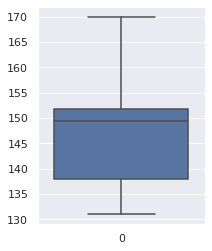

In [14]:
# Create a boxplot of the distribution of all species. 

sns.set(rc = {'figure.figsize':(3,4)})
ax = sns.boxplot(data=birds_summary)
q1 = 139
q3 = 166
outlier_top = q3 + 1.5 * (q3 - q1)
outlier_bottom = q1 - 1.5 * (q3 - q1)

for val in birds_summary:
    if val > outlier_top or val < outlier_bottom:
        label = birds_summary[birds_summary == val].index[0]
        plt.text(x=0, y=val, s=label)

Looking above, the distribution between the species is fairly even. Minimum number photos of 131 and maximum of 170. Median number of photos are 149. 
The imbalance is quite small and as the dataset is quite large, valuable information may be lost if certain images are removed to balance the numbers. The ratio is not a large imbalance compared to say for example 100 to 1 or greater, so it is not expected to bias the model towards the species with the largest numbers.

## Visualising the dataset

Some random images of the bird species in the dataset are show below.

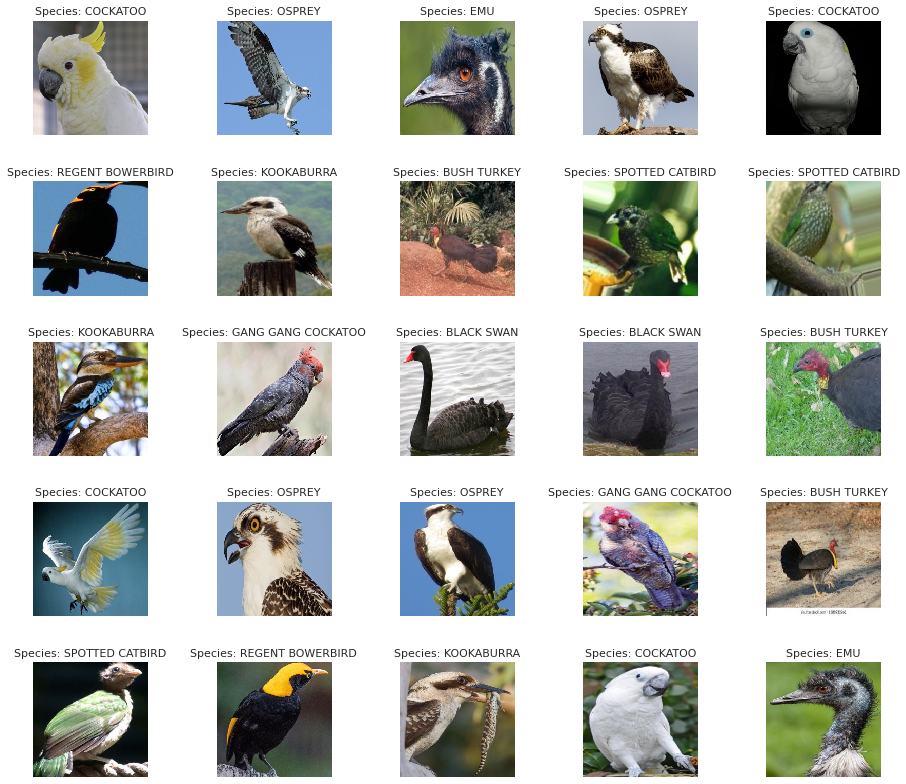

In [15]:
plt.figure(figsize=(15,15))
for idx in range(0,25):
  ran_idx = random.randint(0, len(images_a))
  plt.subplot(5,5,idx+1)
  plt.subplots_adjust(left=0.1,
                  bottom=0.1,
                  right=0.9,
                  top=0.8,
                  wspace=0.4,
                  hspace=0.4)
  plt.axis("off")
  plt.imshow(np.reshape(images_a[ran_idx], (224,224,3)), interpolation='nearest')
  plt.title('Species: {}'.format(bird_list[target_idx_a[ran_idx]]), fontsize = 11)
plt.show()

# <span style="color: darkblue;">Split the feature vectors into training and test sets.</span>

80% of the data will be used to train the models and 20% will be used to test the models' accuracy. The dataset is split as follows: As the number of images for each bird species is slightly imbalanced, a stratified train test split will be performed. This will maintain the same proportion of each species in both the training and test sets.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(images_rs, target_lbl_a, 
                                                    test_size = 0.2, random_state = 42, stratify=target_lbl_a)

**Display the shape of the training and test input and target features**

In [17]:
X_train.shape

(1140, 150528)

In [18]:
X_test.shape

(285, 150528)

In [19]:
y_train.shape

(1140,)

In [20]:
y_test.shape

(285,)

# <span style="color: darkblue;">**Accuracy Analysis for SVM, RFC and CNN Models.**</span>
The support vector machine, the Random Forest Classifier and the CNN model will be evaluated on the dataset and compared. Several different methods will be applied to improve the model performance. To keep this report as brief as possible, these methods will only be applied to the SVM model. They will at first not be pipelined but rather done separately to observe the individual impact of each step in the process.

### **Model Evaluation**
Three configurations of Random Forest models and Six Support Vector Machine models and a CNN will be trained and evaluated in this section.

## **Model RFC_1 - Random Forest**

Decision trees can be susceptible to overfitting the data as they can go down several nodes and can start modelling the random noise. They are also susceptible to instability. Even a small change in the dataset could produce a remarkably different tree. This could lead to a big variation in accuracy of predicting the test or actual data. A random forest constructs multiple decision trees utilizing different subsets of the training dataset and its features for each tree in the 'random forest' [10]. The decisions of each tree are counted and the result with the highest count will be the decision that the forest makes. SKLearn's random forest model is very similar to a decision tree model and it will be evaluated here.

##### **Build a Random Forest Model**
First a Random Forest model will be built and it will be evaluated to see how well it can accurately classify bird species from the dataset.

In [21]:
# Create an instance of the random forest model with default 100 trees in the forest.
rfc_1 = RandomForestClassifier(random_state=1)

In [22]:
rfc_1.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

<span style="color: darkblue;">**Note: A consistent random state was set in all the decision tree based models. If this was left unset, the accuracy results and maxium depth would vary with each run.**</span>

In [23]:
# Display the model's parameters.
params = rfc_1.get_params()
params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

**Print the accuracy of predicting on the training set**

In [24]:
rfc_1.score(X_train, y_train)

1.0

<span style="color: darkblue;">An accuracy of 100% on the training set is of course optimal but the real test is how it performs on the test set. This may be indicative of high variance or overfitting in the model.</span>

### **Cross Validation**
Perform cross validation to estimate the performance of Random Forest Model.

In [25]:
kf=KFold(n_splits=5)
score=cross_val_score(rfc_1,X_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.53070175 0.59210526 0.55263158 0.55701754 0.61842105]
Average Cross Validation score :0.5701754385964912


The average cross validation score is 0.57 and the accuracy on predicting 
the entire training dataset is 1.0.
This is a strong indication of overfitting. 

**Predict the classifications on the test set**

In [26]:
y_pred  = rfc_1.predict(X_test)

## **Evaluate the model**

### Display accuracy, precision and recall on the test set 

In [27]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average = 'weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average = 'weighted'))
print("F1-score:",metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy: 0.6421052631578947
Precision: 0.6368970795286584
Recall: 0.6421052631578947
F1-score: 0.6307840400892738


The training set accuracy is similar to the cross validation score which indicates there is overfitting. 

##### Display the classification report for rfc_1

In [28]:
print(metrics.classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

        BLACK SWAN       0.60      0.77      0.68        31
       BUSH TURKEY       0.49      0.58      0.53        33
          COCKATOO       0.73      0.89      0.80        27
               EMU       0.43      0.36      0.39        25
GANG GANG COCKATOO       0.75      0.70      0.72        30
        KOOKABURRA       0.53      0.28      0.36        29
            OSPREY       0.70      0.54      0.61        26
  RAINBOW LORIKEET       0.82      0.79      0.81        29
  REGENT BOWERBIRD       0.75      0.92      0.83        26
   SPOTTED CATBIRD       0.59      0.59      0.59        29

          accuracy                           0.64       285
         macro avg       0.64      0.64      0.63       285
      weighted avg       0.64      0.64      0.63       285



**Confusion matrix visualization**

A confusion matrix will provide visual information on the model's accuracy.

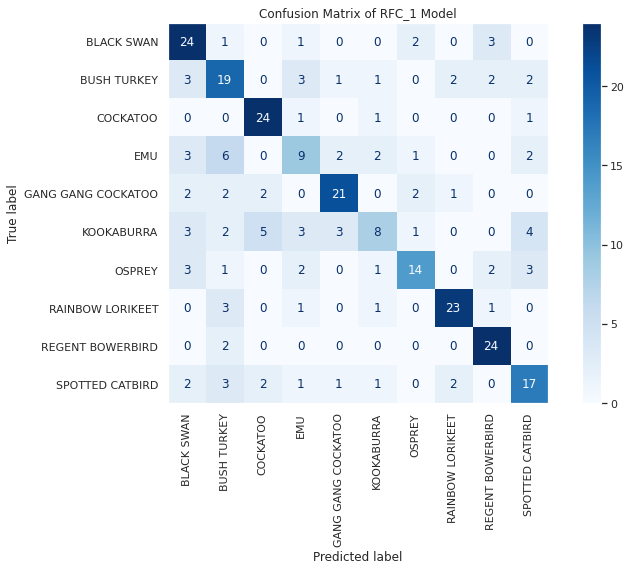

In [29]:
fig, ax = plt.subplots(figsize=(12, 7))
metrics.plot_confusion_matrix(rfc_1,X_test,y_test, cmap=plt.cm.Blues, ax=ax)
plt.title("Confusion Matrix of RFC_1 Model")
plt.grid(False)
plt.xticks(rotation = 90)
plt.show()

**Evaluation of Model RFC_1, Random Forest**

After running rfc_1 model with default parameters on pre-standardized data, the model received an overall accuracy of 64.2%, corresponding to 102 mispredictions out of 285 samples in the test set. As noted, the model performed perfectly on the training data but significantly worse on the test set. This confirms the model is overfitting the training data. The rfc_1 model's hyperparameters will be tuned to see if the model's performance improves.

## **Model RFC_2 - Hyperparameter Tuning of the Random Forest model**

In [30]:
# Create an instance of the random forest model with default 100 trees in the forest.
rfc_2 = RandomForestClassifier(random_state=1)

**Run the Grid Search on the set of hyperparameters and fit the training data**

Cross-validation will be performed to determine the best model. The training dataset will be split into 5 folds. Every 5th fold will be used once for validation and 4 times for training. The results will be aggregated together and fitted to the model. This process will be repeated three times to reduce randomess of the results.

Below the model's hyperparameters are set based on the code provided for this project and on a tutorial by Jason Brownlee [11].

**Set the hyperparameters for the grid search**

Note: Due to processing time constraints n_samples was not increased in the grid search. 

In [31]:
params = {'criterion': ['gini', 'entropy', 'log_loss'],
          'max_features': ['sqrt', 'log2', 'None']          }

In [32]:
# set up cross validation to split into 5 folds instead of 10 to save time.
# Also, Repeat reduces the randomness of the result To save processing time, 
# this was set to just 2 for ths project.

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)

grs_1 = GridSearchCV(estimator=rfc_2, param_grid=params, 
    cv=cv, scoring='accuracy', error_score=0)

**Determine the best hyperparameter settings by running the grid search**

In [33]:
# get the start time
st = time.time()

# Fit the grid search options to the training data.
grs_1.fit(X_train, y_train)

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print(str(round(elapsed_time,2)) + " seconds")

911.95 seconds


##### Display the optimal values

In [34]:
print("Best Hyper Parameters:", grs_1.best_params_)

Best Hyper Parameters: {'criterion': 'gini', 'max_features': 'sqrt'}


##### Make a prediction and calculate metrics

In [35]:
# Summarize the results
print("Best: %f using %s" % (grs_1.best_score_, grs_1.best_params_))
means = grs_1.cv_results_['mean_test_score']
stds = grs_1.cv_results_['std_test_score']
params = grs_1.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# The first line of the output above shows the best combination
# of hyperparameters and their resulting accuracy in the training dataset.

Best: 0.593421 using {'criterion': 'gini', 'max_features': 'sqrt'}
0.593421 (0.020199) with: {'criterion': 'gini', 'max_features': 'sqrt'}
0.582018 (0.026538) with: {'criterion': 'gini', 'max_features': 'log2'}
0.000000 (0.000000) with: {'criterion': 'gini', 'max_features': 'None'}
0.576754 (0.027826) with: {'criterion': 'entropy', 'max_features': 'sqrt'}
0.564912 (0.027376) with: {'criterion': 'entropy', 'max_features': 'log2'}
0.000000 (0.000000) with: {'criterion': 'entropy', 'max_features': 'None'}
0.000000 (0.000000) with: {'criterion': 'log_loss', 'max_features': 'sqrt'}
0.000000 (0.000000) with: {'criterion': 'log_loss', 'max_features': 'log2'}
0.000000 (0.000000) with: {'criterion': 'log_loss', 'max_features': 'None'}


In [36]:
print("Best Hyper Parameters:", grs_1.best_params_)

Best Hyper Parameters: {'criterion': 'gini', 'max_features': 'sqrt'}


In [37]:
# Fit the best hyperparameters to the model.
rfc_2 = grs_1.best_estimator_

##### Display the accuracy of predicting the training set

In [38]:
# Check the accuracy score on the training dataset.
score = rfc_2.score(X_train, y_train)
print("Accuracy:",score)

Accuracy: 1.0


In [39]:
print("Best: %f using %s" % (grs_1.best_score_, grs_1.best_params_))

Best: 0.593421 using {'criterion': 'gini', 'max_features': 'sqrt'}



The best estimate of cross validation is 0.593 and the accuracy on predicting 
the entire training dataset is 1.
Again the model is overfitting despite hyperparameter tuning.

In [40]:
# Display the model's parameters.
params = rfc_2.get_params()
params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

##### Predict the classifications on the test set

In [41]:
y_pred2= rfc_2.predict(X_test)

### Evaluate the model

##### Display accuracy, precision and recall on the test set

In [42]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print("Precision:",metrics.precision_score(y_test, y_pred2, average = 'weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred2, average = 'weighted'))
print("F1-score:",metrics.f1_score(y_test, y_pred2, average = 'weighted'))

Accuracy: 0.6421052631578947
Precision: 0.6368970795286584
Recall: 0.6421052631578947
F1-score: 0.6307840400892738


As confirmed, the test accuracy is similar to the estimated cross validation score. 

##### Display the classification report for rfc_2

In [43]:
print(metrics.classification_report(y_test, y_pred2))

                    precision    recall  f1-score   support

        BLACK SWAN       0.60      0.77      0.68        31
       BUSH TURKEY       0.49      0.58      0.53        33
          COCKATOO       0.73      0.89      0.80        27
               EMU       0.43      0.36      0.39        25
GANG GANG COCKATOO       0.75      0.70      0.72        30
        KOOKABURRA       0.53      0.28      0.36        29
            OSPREY       0.70      0.54      0.61        26
  RAINBOW LORIKEET       0.82      0.79      0.81        29
  REGENT BOWERBIRD       0.75      0.92      0.83        26
   SPOTTED CATBIRD       0.59      0.59      0.59        29

          accuracy                           0.64       285
         macro avg       0.64      0.64      0.63       285
      weighted avg       0.64      0.64      0.63       285



##### Confusion matrix visualization

A confusion matrix will provide visual information on the model's accuracy.

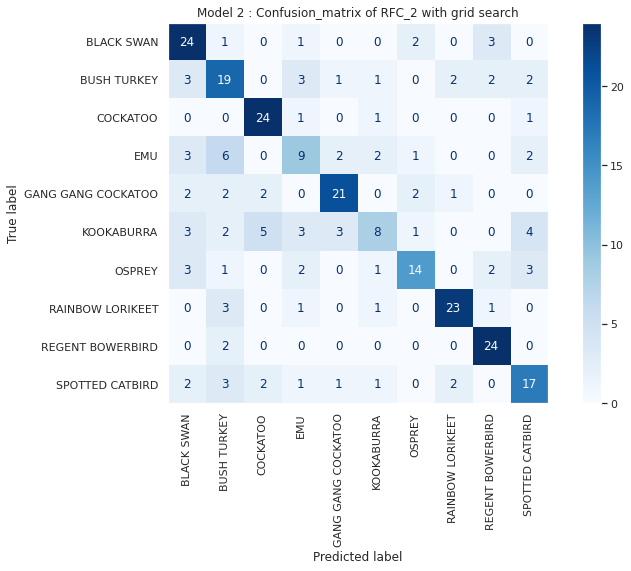

In [44]:
fig, ax = plt.subplots(figsize=(12, 7))
metrics.plot_confusion_matrix(rfc_2,X_test,y_test, cmap=plt.cm.Blues, ax=ax)
plt.title("Model 2 : Confusion_matrix of RFC_2 with grid search")
plt.grid(False)
plt.xticks(rotation = 90)
plt.show()

#### Evaluation of RFC_2, Random Forest with grid search

Surprisingly the results of the rfc_2 model are still the same after tuning the hyperparameters with an accuracy of 64.2%. The hyperparameter tuning did not improve for the random forest classifier on this dataset. As the grid search can take a long time to process, the hyperparameter list was brief, possibly explaining why there were no improvements in the model performance.Despite tuning the hyperparameter the is still overfitting.

## Model RFC_3 - Random Forest with 1000 trees

In [45]:
# Create an instance of the random forest model with 1000 trees in the forest.
rfc_3 = RandomForestClassifier(n_estimators = 1000, random_state=1)

In [46]:
rfc_3.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=1)

<span style="color: darkblue;">**Note: A consistent random state was set in all the decision tree based models. If this was left unset, the accuracy results and maxium depth would vary with each run.**</span>

In [47]:
# Display the model's parameters.
params = rfc_3.get_params()
params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

**Print the accuracy of predicting on the training set**

In [48]:
rfc_3.score(X_train, y_train)

1.0

<span style="color: darkblue;">**An accuracy of 100% on the training set is of course optimal but the real test is how it performs on the test set. This may be indicative of high variance or overfitting in the model.**</span>

**Predict the classifications on the test set**

In [49]:
y_pred3  = rfc_3.predict(X_test)

## Evaluate the model

### Display accuracy, precision and recall on the test set 

In [50]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))
print("Precision:",metrics.precision_score(y_test, y_pred3, average = 'weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred3, average = 'weighted'))
print("F1-score:",metrics.f1_score(y_test, y_pred3, average = 'weighted'))

Accuracy: 0.6350877192982456
Precision: 0.6361423589399463
Recall: 0.6350877192982456
F1-score: 0.6285716269570024


The training set accuracy is similar to the cross validation score which indicates there is overfitting. 

##### Display the classification report for rfc_3

In [51]:
print(metrics.classification_report(y_test, y_pred3))

                    precision    recall  f1-score   support

        BLACK SWAN       0.53      0.68      0.59        31
       BUSH TURKEY       0.48      0.42      0.45        33
          COCKATOO       0.71      0.89      0.79        27
               EMU       0.55      0.44      0.49        25
GANG GANG COCKATOO       0.76      0.63      0.69        30
        KOOKABURRA       0.57      0.41      0.48        29
            OSPREY       0.75      0.58      0.65        26
  RAINBOW LORIKEET       0.79      0.79      0.79        29
  REGENT BOWERBIRD       0.75      0.92      0.83        26
   SPOTTED CATBIRD       0.51      0.62      0.56        29

          accuracy                           0.64       285
         macro avg       0.64      0.64      0.63       285
      weighted avg       0.64      0.64      0.63       285



**Confusion matrix visualization**

A confusion matrix will provide visual information on the model's accuracy.

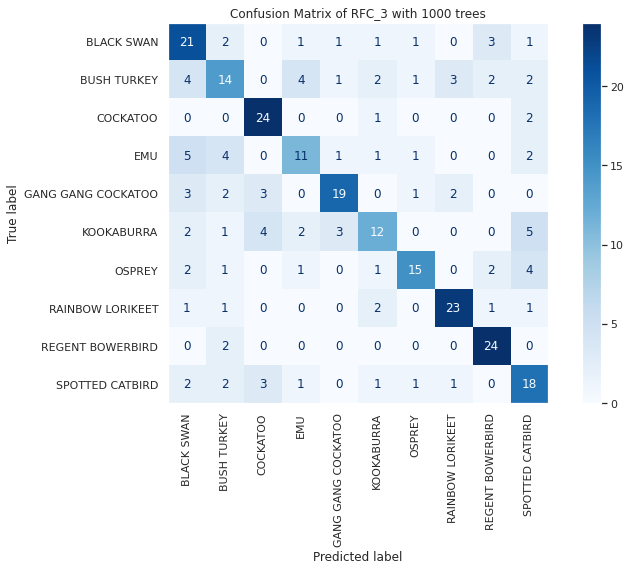

In [52]:
fig, ax = plt.subplots(figsize=(12, 7))
metrics.plot_confusion_matrix(rfc_3,X_test,y_test, cmap=plt.cm.Blues, ax=ax)
plt.title("Confusion Matrix of RFC_3 with 1000 trees")
plt.grid(False)
plt.xticks(rotation = 90)
plt.show()

**Evaluation of Model RFC_3, Random Forest**

In the rfc_3 model, the overall accuracy score is slightly worse than the other two random forest models. In model 3, we have increased the n_estimator to 1000 and achieved 63.5%. This model has mispredicted 104 bird species out of 285 samples in the test set. However, there is a huge difference between the accuracy of training data and test data, which indicates the overfitting behavior of the model.

As we have run a total of three different models where hyper-tuning was also involved to improve the performance and all three cases model showed overfitting, which might reveal that decision based model does not perform well with this bird dataset.

## Model SVC_1 - Build a Default SVM model
A support vector machine (SVM) model will also be used to predict the outcome of the dataset. Then, It will be compared to the Random Forest and CNN model to see if it can predict bird species more accurately. 

In [53]:
# Import support vector classification model
svc_1 = SVC()

### Train the model and predict the outcome
Train the model on the training set.

In [54]:
svc_1.fit(X_train,y_train)

SVC()

In [55]:
# Display the model's parameters.
params = svc_1.get_params()
params

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

##### Print the accuracy of predicting the training set

In [56]:
# Check the accuracy score on the training dataset.
score = svc_1.score(X_train, y_train)
print("Accuracy:",score)

Accuracy: 0.9447368421052632


### **Cross Validation**
Perform cross validation to estimate the performance of Random Forest Model.

In [57]:
kf=KFold(n_splits=5)
score=cross_val_score(svc_1,X_train,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.55263158 0.59210526 0.62280702 0.65789474 0.6622807 ]
Average Cross Validation score :0.6175438596491227


The average cross validation score is 0.612 and the accuracy on predicting 
the entire training dataset is 0.944.
This is a strong indication of overfitting. 


##### Predict the classifications on the test set

In [58]:
y_pred4= svc_1.predict(X_test)

### Evaluate the default model

##### Display accuracy, precision and recall on the test set

In [59]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred4))
print("Precision:",metrics.precision_score(y_test, y_pred4, average = 'weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred4, average = 'weighted'))
print("F1-score:",metrics.f1_score(y_test, y_pred4, average = 'weighted'))

Accuracy: 0.6631578947368421
Precision: 0.6813756613756614
Recall: 0.6631578947368421
F1-score: 0.6652703994389931


##### Display the classification report

In [60]:
print(metrics.classification_report(y_test, y_pred4))

                    precision    recall  f1-score   support

        BLACK SWAN       0.53      0.68      0.59        31
       BUSH TURKEY       0.55      0.52      0.53        33
          COCKATOO       0.77      0.89      0.83        27
               EMU       0.50      0.56      0.53        25
GANG GANG COCKATOO       0.79      0.63      0.70        30
        KOOKABURRA       0.71      0.59      0.64        29
            OSPREY       0.89      0.62      0.73        26
  RAINBOW LORIKEET       0.83      0.69      0.75        29
  REGENT BOWERBIRD       0.77      0.88      0.82        26
   SPOTTED CATBIRD       0.51      0.62      0.56        29

          accuracy                           0.66       285
         macro avg       0.69      0.67      0.67       285
      weighted avg       0.68      0.66      0.67       285



##### Confusion matrix visualization with heatmap

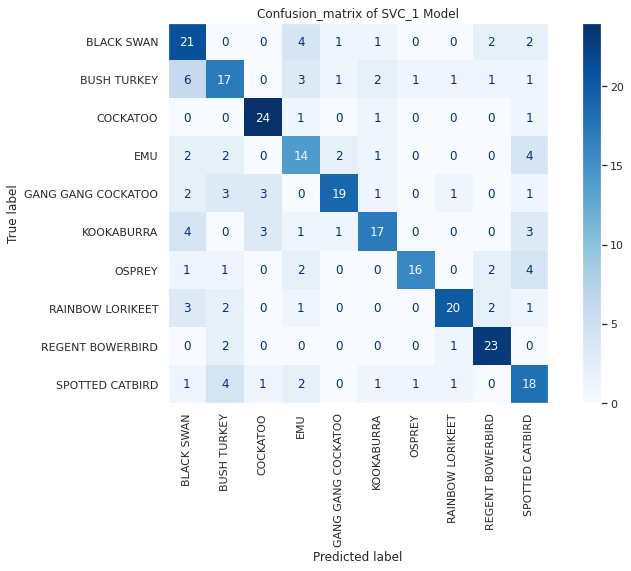

In [61]:
fig, ax = plt.subplots(figsize=(12, 7))
metrics.plot_confusion_matrix(svc_1,X_test,y_test, cmap=plt.cm.Blues, ax=ax)
plt.title("Confusion_matrix of SVC_1 Model")
plt.grid(False)
plt.xticks(rotation = 90)
plt.show()

### Evaluation of SVC_1, Default SVM

The default SVM model has an overall accuracy score of 66.3% on the test data set whereas on training 
data this score was around 94.47%. This model misspredicts 96 images out of 285 images 
from the test dataset. However, this is better than the Random Forest models but it is still poor accuracy.  The poor performance on the testing set may be an indication 
of overfitting. Various methods will now be applied to improve the accuracy of the SVM model.



## Model SVC_2 - Standardized Default SVM Model

## Standardization

Standardization is a feature scaling process of subtracting the mean value from each feature and then dividing the difference by the feature's standard deviation [12]. Distance algorithms including SVM are adversely affected by the difference in the range of features [11]. They use distances between data points to determine their similarity. <br>

Tree based algorithms are not affected by the difference in scale of the features. A decision tree only splits a node based on a single feature.<br>
Instead of directly invoking a scale function, a Scikit-Learn feature called the Transformer API will be used [12].

Fit the transformer on the training set only.

In [62]:
scaler = preprocessing.StandardScaler().fit(X_train)

The scaler object now has the saved means and standard deviations for each feature in the training set. The result will be displayed

In [63]:
X_train_scaled = scaler.transform(X_train)

In [64]:
# Display the mean value of each feature after scaling.
print(X_train_scaled.mean(axis=0))

[-3.79082730e-17 -8.62492339e-17  8.16841721e-17 ... -2.44443841e-17
  5.35633915e-17  1.36148402e-16]


The output above shows that the mean value of each feature is now effectively 0. 


In [65]:
# Display the standard deviation of each feature after scaling.
print(X_train_scaled.std(axis=0))

[1. 1. 1. ... 1. 1. 1.]


The output above shows that the standard deviation of each feature is now 1.

Next, the same scaler object is used to transform the test set using the exact same means and standard deviations used to transform the training set. If the test set was scaled separately, it would not be a fair evaluation of the model.

In [66]:
X_test_scaled = scaler.transform(X_test)

In [67]:
# Display the mean value of each feature in the test set after scaling.
print(X_test_scaled.mean(axis=0))

[-0.05200719 -0.04074393 -0.07646389 ... -0.12948137 -0.15019497
 -0.15453425]


The mean values of the features of the test set are now close to 0 but are not perfectly centred.  This is expected, the test set is transformed using the means from the training set.

In [68]:
# Display the standard deviation of each feature in the test set after scaling.
print(X_test_scaled.std(axis=0))

[0.95666541 0.94060583 0.95099729 ... 0.95967045 0.94872677 0.94847911]


The standard deviation of each feature in the test set is now close to 1 as is expected.

### Create an instance of the SVM model

In [69]:
svc_2 = SVC()

##### Train the model and predict the outcome
Train the model on the training set.

In [70]:
svc_2.fit(X_train_scaled,y_train)

SVC()

In [71]:
# Display the model's parameters.
svc_2.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

##### Print the accuracy of predicting the training set

In [72]:
score = svc_2.score(X_train_scaled,y_train)
print("Accuracy:",score)

Accuracy: 0.9482456140350877


### **Cross Validation**
Perform cross validation to estimate the performance of Random Forest Model.

In [73]:
kf=KFold(n_splits=5)
score=cross_val_score(svc_2,X_train_scaled,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.55263158 0.5877193  0.62719298 0.65350877 0.67982456]
Average Cross Validation score :0.6201754385964913


The average cross validation score is 0.630 and the accuracy on predicting 
the entire training dataset is 0.948. This is a strong indication of overfitting. 

##### Predict the classifications on the test set

In [74]:
y_pred5=svc_2.predict(X_test_scaled)

##### Evaluate the standard model

In [75]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred5))
print("Precision:",metrics.precision_score(y_test, y_pred5, average = 'weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred5, average = 'weighted'))
print("F1-score:",metrics.f1_score(y_test, y_pred5, average = 'weighted'))

Accuracy: 0.6701754385964912
Precision: 0.6847154399620027
Recall: 0.6701754385964912
F1-score: 0.6710669392349785


##### The Classification report Display the classification report of svc_2

In [76]:
print(metrics.classification_report(y_test, y_pred5))

                    precision    recall  f1-score   support

        BLACK SWAN       0.54      0.71      0.61        31
       BUSH TURKEY       0.55      0.52      0.53        33
          COCKATOO       0.81      0.93      0.86        27
               EMU       0.48      0.56      0.52        25
GANG GANG COCKATOO       0.76      0.63      0.69        30
        KOOKABURRA       0.68      0.59      0.63        29
            OSPREY       0.89      0.62      0.73        26
  RAINBOW LORIKEET       0.83      0.69      0.75        29
  REGENT BOWERBIRD       0.77      0.88      0.82        26
   SPOTTED CATBIRD       0.58      0.62      0.60        29

          accuracy                           0.67       285
         macro avg       0.69      0.67      0.67       285
      weighted avg       0.68      0.67      0.67       285



##### Create a confusion Matrix

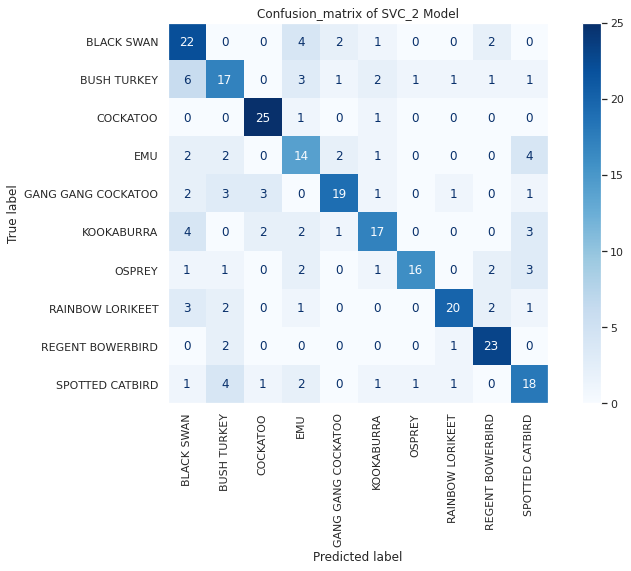

In [77]:
fig, ax = plt.subplots(figsize=(12, 7))
metrics.plot_confusion_matrix(svc_2,X_test_scaled,y_test, cmap=plt.cm.Blues, ax=ax)
plt.title("Confusion_matrix of SVC_2 Model")
plt.grid(False)
plt.xticks(rotation = 90)
plt.show()

### Evaluation of Model SVC_2, Standardized Default SVM Model

After standardizing the bird dataset, the accuracy increaased slightly to 67.5% compared to 66.3% for
the default svc_1 model. Standardization has not improved the model's performance significantly. 
As there is high accuracy on training data and 
low accuracy on testing data, this indicates the model is overfitting. Next 
PCA will be applied on the scaled data.


## Model SVC_3 - Standarized PCA with Default SVM Model

# Feature Selection
Feature selection is a method to reduce the number of variables in a dataset before modelling. Many features or attributes in a dataset often have a minimal impact on the performance of the model and so removing them can considerably reduce the time required to create the model without adversely affecting the model's performance. Several methods are available to perform feature selection. 

One option is the Chi-Squared Statistical test, however to use this, all values of the features must be positive. As the standardized dataset has proved to be very advantageous in our modelling it will continue to be used however as it contains negative values, Chi-Squared cannot be used.

### Feature extraction will be necessary to reduce the processing time of the models.

**Reduced Dataset**

A reduced dataset will be made where features exhibiting very strong collinearity with each other will be removed. The feature that has the strongest correlation to the target variable will be the one that is retained. Note that the threshold of multicollinearity correlation for removal was set to 0.9 in the new data set to evaluate the results.

## Principal Component Analysis
Principal Component Analysis (PCA) is a common method used to speed up the machine learning algorithm by reducing the number of dimensions (or features) in the dataset. It will be used on the bird species dataset.

In [78]:
# Reduce the number of features to those that cover 99.5% of the variance.
pca = PCA(0.995)

In [79]:
pca.fit(X_train_scaled)

PCA(n_components=0.995)

In [80]:
pca.n_components_

1026

With applying PCA, the number of features has been drastically reduced from 150528 to just 1026 will mainting 99.5% of the total variance. This is a large reduction.

In [81]:
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

### Create an instance of the SVM model

In [82]:
svc_3 = SVC()

##### Train the model and predict the outcome
Train the model on the training set.

In [83]:
svc_3.fit(X_train_pca,y_train)

SVC()

In [84]:
# Display the model's parameters.
svc_3.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

##### Display the accuracy of predicting on the training set

In [85]:
score = svc_3.score(X_train_pca,y_train)
print("Accuracy:",score)

Accuracy: 0.9464912280701754


### **Cross Validation**
Perform cross validation to estimate the performance of Random Forest Model.

In [86]:
kf=KFold(n_splits=5)
score=cross_val_score(svc_3,X_train_pca,y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.55263158 0.59210526 0.62719298 0.65789474 0.67982456]
Average Cross Validation score :0.6219298245614036


The average cross validation score is 0.622 and the accuracy on predicting 
the entire training dataset is 0.946.
This is a strong indication of overfitting. 

##### Predict the classifications on the test set

In [87]:
y_pred6=svc_3.predict(X_test_pca)

##### The Classification report Display the classification report of svc_6

In [88]:
print(metrics.classification_report(y_test, y_pred6))

                    precision    recall  f1-score   support

        BLACK SWAN       0.52      0.71      0.60        31
       BUSH TURKEY       0.54      0.39      0.46        33
          COCKATOO       0.80      0.89      0.84        27
               EMU       0.46      0.68      0.55        25
GANG GANG COCKATOO       0.68      0.63      0.66        30
        KOOKABURRA       0.72      0.45      0.55        29
            OSPREY       0.94      0.62      0.74        26
  RAINBOW LORIKEET       0.83      0.69      0.75        29
  REGENT BOWERBIRD       0.77      0.88      0.82        26
   SPOTTED CATBIRD       0.54      0.66      0.59        29

          accuracy                           0.65       285
         macro avg       0.68      0.66      0.66       285
      weighted avg       0.68      0.65      0.65       285



##### Evaluate the model

In [89]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred6))
print("Precision:",metrics.precision_score(y_test, y_pred6, average = 'weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred6, average = 'weighted'))
print("F1-score:",metrics.f1_score(y_test, y_pred6, average = 'weighted'))

Accuracy: 0.6526315789473685
Precision: 0.6765425066818257
Recall: 0.6526315789473685
F1-score: 0.6515555464385001


#####  Create a confusion Matrix

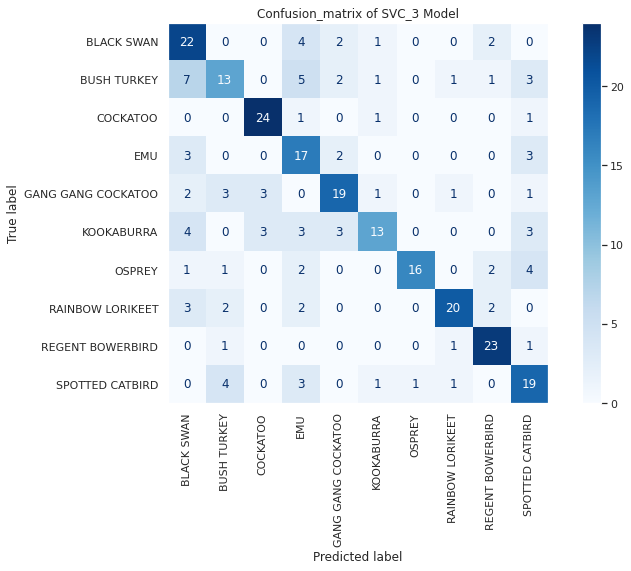

In [90]:
fig, ax = plt.subplots(figsize=(12, 7))
metrics.plot_confusion_matrix(svc_3,X_test_pca,y_test, cmap=plt.cm.Blues, ax=ax)
plt.title("Confusion_matrix of SVC_3 Model")
plt.grid(False)
plt.xticks(rotation = 90)
plt.show()

### Evaluation of Model SVC_3, Standardized PCA with Default SVM Model

After performing PCA on a scaled dataset, model 5 svc_p returned a 65.3% accuracy score and predicted 99 images incorrectly out of 285 samples of the test set. As usual, on the training dataset, 
the model demonstrated a higher accuracy which is 94.6%. So, it indicates that  PCA and standardization both 
failed to improve the accuracy scores of the SMV model after using default parameters. Therefore,  we will 
tune the hyperparameters to improve the model performance. 



## Model SVC_4 - Standardized PCA with tune hyperparameters

In [91]:
# Create an instance of the model.
svc_4 = SVC()

Parameters setup:
Four kernels are chosen and various hyperparameters pertaining to them will be tested to determine what is the optimum combination of settings for this dataset.


In [92]:
param_grid = [{'C': [0.1, 0.5, 1, 5],
       'kernel': ['linear'], 'class_weight': ['balanced']},
      {'C': [0.1, 1, 10], 'kernel': ['rbf'],
       'gamma': [0.01, 0.05, 0.1, 1],
       'class_weight': ['balanced']},
      {'C': [0.1, 0.5, 1, 5], 'kernel': ['poly'],
       'gamma': ['scale', 0.01, 0.1, 0.5, 1],
       'degree': [1, 2, 3, 4], 'coef0': [0.0, 0.1, 0.5, 1],
       'class_weight': ['balanced'], 'max_iter': [200]},
      {'C': [0.1, 0.5, 1, 5], 'kernel': ['sigmoid'],
       'gamma': [0.01, 0.1, 0.5, 1],
       'coef0': [0.0, 0.1, 0.5], 'class_weight': ['balanced']}]

In [93]:
# set up cross validation to split into 5 folds. Repeat 2 times
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)

In [94]:
# Load the model and all parameters into the grid search.
grs_2 = GridSearchCV(estimator=svc_4, param_grid=param_grid, cv=cv, 
                    scoring='accuracy', error_score=0)

In [95]:
# Test and fit the grid search options to the training data.
grs_2.fit(X_train_pca, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=1),
             error_score=0, estimator=SVC(),
             param_grid=[{'C': [0.1, 0.5, 1, 5], 'class_weight': ['balanced'],
                          'kernel': ['linear']},
                         {'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                          'gamma': [0.01, 0.05, 0.1, 1], 'kernel': ['rbf']},
                         {'C': [0.1, 0.5, 1, 5], 'class_weight': ['balanced'],
                          'coef0': [0.0, 0.1, 0.5, 1], 'degree': [1, 2, 3, 4],
                          'gamma': ['scale', 0.01, 0.1, 0.5, 1],
                          'kernel': ['poly'], 'max_iter': [200]},
                         {'C': [0.1, 0.5, 1, 5], 'class_weight': ['balanced'],
                          'coef0': [0.0, 0.1, 0.5],
                          'gamma': [0.01, 0.1, 0.5, 1],
                          'kernel': ['sigmoid']}],
             scoring='accuracy')

In [96]:
print("Best Hyper Parameters:", grs_2.best_params_)

Best Hyper Parameters: {'C': 5, 'class_weight': 'balanced', 'coef0': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': 200}


In [97]:
# Make a prediction and calculate metrics
svc_4 = grs_2.best_estimator_ 

In [98]:
# Summarize the cross validation results
print("Best: %f using %s" % (grs_2.best_score_, grs_2.best_params_))
means = grs_2.cv_results_['mean_test_score']
stds = grs_2.cv_results_['std_test_score']
params = grs_2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.653947 using {'C': 5, 'class_weight': 'balanced', 'coef0': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': 200}
0.629825 (0.029630) with: {'C': 0.1, 'class_weight': 'balanced', 'kernel': 'linear'}
0.629825 (0.029630) with: {'C': 0.5, 'class_weight': 'balanced', 'kernel': 'linear'}
0.629825 (0.029630) with: {'C': 1, 'class_weight': 'balanced', 'kernel': 'linear'}
0.629825 (0.029630) with: {'C': 5, 'class_weight': 'balanced', 'kernel': 'linear'}
0.094737 (0.003509) with: {'C': 0.1, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf'}
0.094737 (0.003509) with: {'C': 0.1, 'class_weight': 'balanced', 'gamma': 0.05, 'kernel': 'rbf'}
0.094737 (0.003509) with: {'C': 0.1, 'class_weight': 'balanced', 'gamma': 0.1, 'kernel': 'rbf'}
0.094737 (0.003509) with: {'C': 0.1, 'class_weight': 'balanced', 'gamma': 1, 'kernel': 'rbf'}
0.109649 (0.006795) with: {'C': 1, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf'}
0.109649 (0.006795) with: {'C': 1, 'class_weight'

The first line of the output above shows the best combination of hyperparameters and  their resulting accuracy in the training dataset.

#### Display the accuracy of predicting on the training set

In [99]:
score = svc_4.score(X_train_pca,y_train)
print("Accuracy:",score)

Accuracy: 1.0


In [100]:
print("Best: %f using %s" % (grs_2.best_score_, grs_2.best_params_))

Best: 0.653947 using {'C': 5, 'class_weight': 'balanced', 'coef0': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': 200}



The best estimate of cross validation is 0.6509 and the accuracy on predicting 
the entire training dataset is .992.
Again the model is overfitting despite hyperparameter tuning.

##### Predict the classifications on the test set

In [101]:
y_pred7=svc_4.predict(X_test_pca)

##### Display the classification report of svc_4

In [102]:
print(metrics.classification_report(y_test, y_pred7))

                    precision    recall  f1-score   support

        BLACK SWAN       0.46      0.68      0.55        31
       BUSH TURKEY       0.63      0.58      0.60        33
          COCKATOO       0.76      0.96      0.85        27
               EMU       0.69      0.72      0.71        25
GANG GANG COCKATOO       0.87      0.67      0.75        30
        KOOKABURRA       0.67      0.48      0.56        29
            OSPREY       0.88      0.58      0.70        26
  RAINBOW LORIKEET       0.77      0.79      0.78        29
  REGENT BOWERBIRD       0.75      0.69      0.72        26
   SPOTTED CATBIRD       0.65      0.76      0.70        29

          accuracy                           0.69       285
         macro avg       0.71      0.69      0.69       285
      weighted avg       0.71      0.69      0.69       285



##### Evaluate the model

In [103]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred7))
print("Precision:",metrics.precision_score(y_test, y_pred7, average = 'weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred7, average = 'weighted'))
print("F1-score:",metrics.f1_score(y_test, y_pred7, average = 'weighted'))

Accuracy: 0.6877192982456141
Precision: 0.7083032652126742
Recall: 0.6877192982456141
F1-score: 0.6880087268181826


##### Create a confusion Matrix

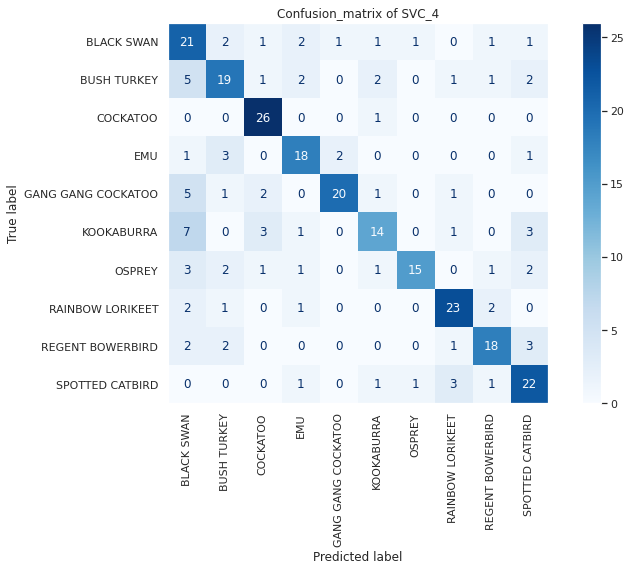

In [104]:
fig, ax = plt.subplots(figsize=(12, 7))
metrics.plot_confusion_matrix(svc_4,X_test_pca,y_test, cmap=plt.cm.Blues, ax=ax)
plt.title("Confusion_matrix of SVC_4")
plt.grid(False)
plt.xticks(rotation = 90)
plt.show()

### Evaluation of Model SVC_4 -  (Standardized PCA dataset model with tuned hyperparameters)

The SVC_4 model has an overall accuracy score of 68.8%. This model's prediction score is better than all the other
Random forest and other SVM models that were tested. Compared to other models, here svc_4, missclassified 89 images out of 285 samples of the test set. Here, we have scaled the dataset and 
then performed principal component analysis on scaled data. Afterward, via grid search, we have used the 
best parameters. Therefore we can confirm that the combination of standardization and principal component 
analysis does play a role to improve the model's accuracy.


## Model SVC_5 - Apply 70/30 (train/test) on SVM Model 
As our svc_5 returned a higher accuracy rate compared to other models, hence we would like to perform our model on the 70/30 train/test ratio to explore the model performance.

In [105]:
# Splitting dataset by 70% training and 30% testing

X_train, X_test, y_train, y_test = train_test_split(images_rs, target_lbl_a, 
        test_size = 0.3, random_state = 42, stratify=target_lbl_a)

In [106]:
# Data Standardization
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [107]:
# Performing Principal Component Analysis
pca = PCA(0.995)
pca.fit(X_train_scaled)

X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [108]:
# Create an instance of support vector classification model with best parameters
svc_5 = SVC(C =1, class_weight= 'balanced', coef0 = 1, degree= 2, gamma= 'scale', kernel= 'poly', max_iter= 200)

##### Train the model on the training set.

In [109]:
svc_5.fit(X_train_pca, y_train)

SVC(C=1, class_weight='balanced', coef0=1, degree=2, kernel='poly',
    max_iter=200)

##### Print the accuracy of predicting the training set

In [110]:
score = svc_5.score(X_train_pca,y_train)
print("Accuracy:",score)

Accuracy: 0.995987963891675


##### Predict the classifications on the test set

In [111]:
y_pred8=svc_5.predict(X_test_pca)

##### Display the classification report

In [112]:
print(metrics.classification_report(y_test, y_pred8))

                    precision    recall  f1-score   support

        BLACK SWAN       0.54      0.66      0.60        47
       BUSH TURKEY       0.67      0.57      0.62        49
          COCKATOO       0.69      0.85      0.76        41
               EMU       0.69      0.76      0.72        38
GANG GANG COCKATOO       0.78      0.64      0.70        44
        KOOKABURRA       0.65      0.56      0.60        43
            OSPREY       0.90      0.68      0.77        40
  RAINBOW LORIKEET       0.77      0.75      0.76        44
  REGENT BOWERBIRD       0.72      0.68      0.70        38
   SPOTTED CATBIRD       0.57      0.70      0.63        44

          accuracy                           0.68       428
         macro avg       0.70      0.69      0.69       428
      weighted avg       0.69      0.68      0.68       428



##### Evaluate the standard model

##### Display accuracy, precision and recall on the test set

In [113]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred8))
print("Precision:",metrics.precision_score(y_test, y_pred8, average = 'weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred8, average = 'weighted'))
print("F1-score:",metrics.f1_score(y_test, y_pred8, average = 'weighted'))

Accuracy: 0.6822429906542056
Precision: 0.6943660747518166
Recall: 0.6822429906542056
F1-score: 0.6829313544288332


##### Create a confusion Matrix

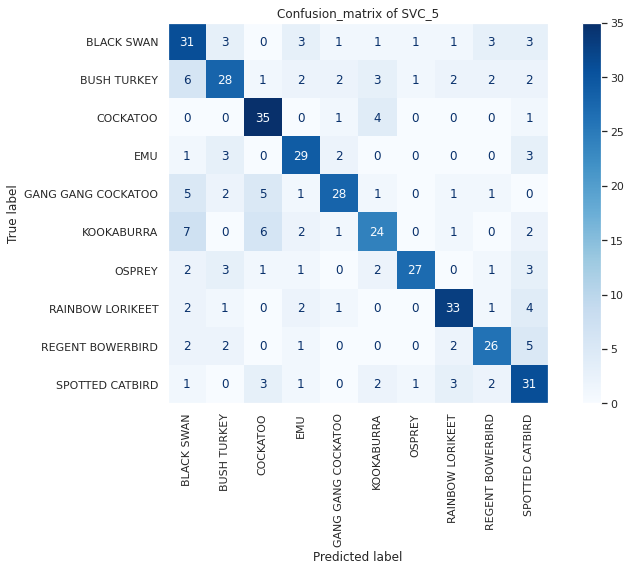

In [114]:
fig, ax = plt.subplots(figsize=(12, 7))
metrics.plot_confusion_matrix(svc_5,X_test_pca,y_test, cmap=plt.cm.Blues, ax=ax)
plt.title("Confusion_matrix of SVC_5")
plt.grid(False)
plt.xticks(rotation = 90)
plt.show()

### Evaluation of SVC_5 -  (Standardized PCA dataset(70/30) model with tuned hyperparameters)

In svc_5 model, our accuracy score is 68.2%, corresponding to 91 mispredictions out of 285 samples in the test set. Based on these scores, we can observe that a 70/30 train-test ratio was slightly worse than the 80/20 ratio.


## Summary of Evaluations of RFC and SVM Models

Various methods were applied to teh RFC and SVM models and in all cases, overfitting was observed. The best performing model is SCV_4 which had an 80/20 train-test split ration to the dataset. It was also applied with standardization, PCA and hyperparameter tuning through a grid search.

Looking above at the misclassified predictions it can be seen birds with similar colours are often missclassified. For example, the darker birds of  Gang Gang Cockatoo,Spotted Catbird and Emus are often missclassified among each other and the whiter birds of Cockatoo and Kookaburra are often misclassified. There are also several other exceptions depending on the background and lighting.

## CNN Model

The final model to be tested will be the Convolutional Neural Network

Most of the code used in the CNN evalution was taken from the PRML CNN Tutorial [2].

### Split the feature vectors into training and test sets
80% of the data will be used to train the models and 20% will be used to test the models' accuracy. The dataset is split as follows: As the number of images for each bird species is slightly imbalanced, a stratified train test split will be performed. This will maintain the same proportion of each species in both the training and test sets.

An earlier run of a 70% to 30% split was done with the resulting accuracy on the test set being less accurate. It was decided to stick with an 80/20 split. The final results will be verified on the independant validation set.

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images_a, target_idx_a, 
        test_size = 0.2, random_state = 42, stratify=target_idx_a)

**Display the shape of the training and test input and target features**

In [116]:
X_train.shape

(1140, 224, 224, 3)

In [117]:
X_test.shape

(285, 224, 224, 3)

In [118]:
y_train.shape

(1140,)

In [119]:
y_test.shape

(285,)

## Building the Model without Convolution Neural Networks

Building the neural network requires configuring the layers of the model, then compiling the model.

**Set up the layers**

The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

In [120]:
# input = (707, 224, 224, 3)
# output = 10 classes = multiple classes

cnn1 = keras.Sequential([
    
    # = (707, 224, 224, 3) -> (707, 150528)
    keras.layers.Flatten(input_shape=(224, 224, 3)),
    
    # a layer of 128 neurons 
    keras.layers.Dense(128, activation='relu'),
    
    keras.layers.Dense(10)
])

## Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

- Loss function — This measures how accurate the model is during training. This function should be minimized to "steer" the model in the right direction.
- Optimizer — This is how the model is updated based on the data it sees and its loss function.
- Metrics — Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [121]:
# parameter tunning = experiments

# optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
# Adam = adaptive momemtum optimization
cnn1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              # target = integers = 0,1,2
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # from_logits=True: no activation on the last layer 
              
              # target = a vector = [1,0,0] (one-hot vector), [0,1,0], [0,0,1] = NLP
              #loss=tf.keras.losses.categorical_crossentropy(from_logits=True)
              metrics=['accuracy'])

# sum(log(y_i)log(1-y_predicted_i)): logylog(1-y_predicted) + log(1-y)log(y_predicted)

## Train the model

Training the neural network model requires the following steps:

Feed the training data to the model. The training data is in the X_train (images) and y_train (labels) arrays.
The model learns to associate images and labels.
After being fit, the model will make predictions on the test set: X_test and y_test.

To execute the training, the model.fit method is called. It "fits" the model to the training data:

In [122]:
history1 = cnn1.fit(X_train, y_train, epochs=10, batch_size= 32, verbose=1, validation_data=(X_test, y_test))
# optimize the parameters including weights and bias: w & b

# 60000 images -> do not want to run all at once: dividing into smaller datasets = batch 
# batch_size = 32: 32 images to run for a batch. Total = 60000/32 = 1875 times = iteration

Epoch 1/10
36/36 [==============================] - 6s 139ms/step - loss: 13727.2686 - accuracy: 0.1798 - val_loss: 5679.3784 - val_accuracy: 0.1509
Epoch 2/10
36/36 [==============================] - 5s 132ms/step - loss: 2378.4429 - accuracy: 0.3500 - val_loss: 1800.7192 - val_accuracy: 0.3053
Epoch 3/10
36/36 [==============================] - 5s 133ms/step - loss: 1112.2856 - accuracy: 0.4553 - val_loss: 1240.9135 - val_accuracy: 0.4526
Epoch 4/10
36/36 [==============================] - 5s 132ms/step - loss: 1321.3195 - accuracy: 0.4825 - val_loss: 1773.6481 - val_accuracy: 0.4175
Epoch 5/10
36/36 [==============================] - 5s 131ms/step - loss: 1241.7045 - accuracy: 0.4684 - val_loss: 2252.0120 - val_accuracy: 0.3088
Epoch 6/10
36/36 [==============================] - 5s 132ms/step - loss: 814.3812 - accuracy: 0.5789 - val_loss: 1008.0830 - val_accuracy: 0.4632
Epoch 7/10
36/36 [==============================] - 5s 133ms/step - loss: 530.9848 - accuracy: 0.6360 - val_loss

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.404 (or 40.4%) on the training data. This is far less accuracy than the random forest and SVM models.

**Plotting the perfomance of model**

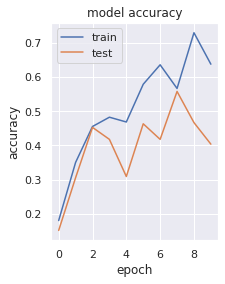

In [123]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

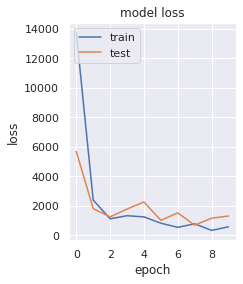

In [124]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Make a prediction

In [125]:
predict_x=cnn1.predict(X_test) 
y_pred1=np.argmax(predict_x,axis=1)

9/9 [==============================] - 0s 41ms/step


In [126]:
y_pred1

array([8, 7, 1, 5, 5, 5, 7, 7, 8, 7, 7, 5, 7, 7, 2, 4, 5, 7, 2, 6, 2, 7,
       5, 7, 5, 7, 1, 5, 7, 6, 7, 6, 5, 4, 6, 5, 7, 0, 0, 7, 5, 8, 8, 5,
       5, 6, 5, 5, 7, 7, 5, 6, 5, 6, 5, 7, 5, 2, 0, 6, 7, 7, 6, 4, 7, 8,
       0, 7, 5, 7, 2, 0, 7, 7, 7, 8, 5, 1, 5, 6, 7, 7, 5, 5, 7, 0, 0, 2,
       7, 7, 0, 2, 4, 4, 7, 5, 8, 7, 5, 7, 5, 1, 8, 8, 7, 7, 7, 5, 3, 6,
       1, 1, 6, 7, 5, 6, 7, 5, 7, 5, 6, 5, 7, 2, 3, 6, 7, 7, 7, 2, 7, 5,
       5, 5, 5, 5, 6, 5, 5, 6, 0, 7, 1, 0, 6, 6, 2, 7, 7, 5, 5, 5, 7, 7,
       7, 0, 5, 2, 6, 5, 0, 7, 0, 7, 5, 8, 6, 5, 5, 6, 0, 5, 7, 5, 2, 5,
       5, 8, 6, 7, 2, 5, 5, 7, 8, 4, 6, 5, 6, 5, 5, 4, 6, 7, 8, 7, 5, 5,
       1, 7, 0, 5, 5, 0, 0, 5, 6, 7, 1, 5, 7, 5, 7, 8, 7, 5, 2, 8, 7, 5,
       1, 5, 5, 7, 2, 7, 0, 7, 5, 7, 7, 5, 5, 5, 2, 7, 7, 7, 5, 5, 7, 0,
       5, 5, 0, 8, 5, 6, 7, 5, 1, 0, 7, 5, 6, 7, 5, 4, 6, 5, 7, 5, 1, 7,
       5, 6, 0, 7, 7, 5, 6, 5, 3, 0, 5, 0, 5, 8, 6, 4, 7, 5, 5, 5, 5])

In [127]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))
print("Precision:",metrics.precision_score(y_test, y_pred1, average = 'weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred1, average = 'weighted'))
print("F1-score:",metrics.f1_score(y_test, y_pred1, average = 'weighted'))

Accuracy: 0.40350877192982454
Precision: 0.5023310649205042
Recall: 0.40350877192982454
F1-score: 0.37095306869167666


The overall accuracy of this basic CNN model is 37.5%. A more advanced cnn model will now be built.

**Summarize the model**

In [128]:
cnn1.summary()

# z = wx+b

#1 neuron: x = (,150528) -> 150528 values of w + 1 value of b

# 128 neurons -> 128*(784 + 1) = 19267712

# 10 classifications
# 10*(128 + 1) = 1290

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 128)               19267712  
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 19,269,002
Trainable params: 19,269,002
Non-trainable params: 0
_________________________________________________________________


The Number of parameters in the layers  of a CNN model is calculated as follows:

dense_2 layers * (flatten_1 + 1) layers
128 * (150528 + 1) = 19267712<br>
10 * (128 + 1) = 1290<br>
There are 128 nodes and each node will have 150528 weights and 1 bias. So the total is 128 * 150528 + 128 = 19267712 parameters.

## Building the Model with Convolution Neural Networks

A Sequential model will be built.

**The Sequential model is a linear stack of layers. It can be first initialized and then we add layers using add method or we can add all layers at the initial stage. The layers added are as follows:**

**Conv2D is a 2D Convolutional layer. The parameters used are:**

- filters - the number of filters (Kernels) used with this layer; here filters = 32;
- kernel_size - the dimmension of the Kernel: (3 x 3);
- activation - is the activation function used, in this case relu;
- input_shape - is the shape of the image presented to the CNN: in this case is 224 x 224 x 3

**MaxPooling2D is a Max pooling operation for data. Parameters used here are:**

pool_size, in this case (2,2), representing the factors by which to downscale in both directions;

**Conv2D with the following parameters:**

- filters: 64;
- kernel_size : (3 x 3);
- activation : relu;

**MaxPooling2D with parameter:**

pool_size : (2,2);

**Conv2D with the following parameters:**

- filters: 128;
- kernel_size : (3 x 3);
- activation : relu;

**Flatten. This layer Flattens the input. It does not affect the batch size. It is used without parameters**

**Dense. This layer is a regular fully-connected NN layer. It is used without parameters:**

- units - this is a positive integer, with the meaning: dimensionality of the output space; in this case is: 128;
- activation - activation function : relu;

**Dense. This is the final layer (fully connected). It is used with the parameters:**

- units: the number of classes (in this project case 10 bird labels);
- activation : softmax; for this final layer it is used softmax activation (standard for multiclass classification)

In [129]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
#from keras.layers.normalization import BatchNormalization
#from keras.layers.advanced_activations import LeakyReLU

### Data preprocessing

As a first step, we will do a data preprocessing to prepare for the model by converting each 224 x 224 x 3 image of the train and test set into a matrix of size 224 x 224 x 3 which is fed into the network.

In [130]:
X_train = X_train.reshape(-1, 224, 224, 3)
X_test = X_test.reshape(-1, 224, 224, 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize the images.
X_train = X_train / 255.
X_test = X_test / 255.

X_train.shape, X_test.shape

((1140, 224, 224, 3), (285, 224, 224, 3))

In [131]:
y_train.shape, y_test.shape

((1140,), (285,))

In [132]:
# This is for use of the loss = categorical_crossentropy

from keras.utils import to_categorical

# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(y_train)
test_Y_one_hot = to_categorical(y_test)

# Display the change for category label using one-hot encoding
print('Original label:', y_train[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 7
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### Build a model

In [133]:
batch_size = 32
epochs = 20
num_classes = 10  # Number of output classes

In [134]:
# Model cnn2
cnn2 = Sequential()
# Add the first layer = conv -> relu -> max pooling.   relu is most appropriate for images.
cnn2.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(224, 224, 3)))
cnn2.add(MaxPooling2D((2, 2)))

# Add the second layer = conv -> relu -> max pooling
cnn2.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))

cnn2.add(MaxPooling2D(pool_size=(2, 2)))
# Add the third layer = conv -> relu
cnn2.add(Conv2D(128, (3, 3), activation='relu'))

# Add a fully connect layer
cnn2.add(Flatten())
cnn2.add(Dense(128, activation='relu'))

# Add a softmax to have an output with 10 classes
cnn2.add(Dense(num_classes, activation='softmax'))


### Compile the model

After the model is created, it is compiled using the Adam optimizer, which is one of the most popular optimization algorithms. Additionally, the loss type is specified. In this case it is categorical cross entropy which is used for multi-class classification, Binary cross-entropy could also be used as the loss function. Finally, specify the metrics as accuracy to analyze while the model is training.

In [135]:
cnn2.compile(
             loss = 'SparseCategoricalCrossentropy',
             # loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

### Early Stopping

To avoid the model from overfitting through several epochs, early stopping will be implemented. Early stopping is a regularization technique that will cause the model training to stop once there is no longer any improvement in the validation set.

In [136]:
# Add early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Visualize the layers created in the above step by using the summary function. This will show some parameters (weights and biases) in each layer and also the total parameters in the model.

In [137]:
cnn2.summary()

# For example, when we say the filter size if 3x3 it is for an image with 1 input channel, 
# for 32 the filter size is 3x3x32 
# When you apply a kernel of 3x3x32 to an image the output is just one channel. 
# To get an output of 64 channels you need 64 such kernels. In that case, the number of parameters would be 3x3x32x64.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 346112)           

**How to calculate numbers of parameters**

The number of parameters in the layers is calculated as follows:

- Parameters in the first conv2d (filter shape = (3,3), stride=1) layer is: filter width * filter height * number of filters in the previous layer * number of filters (weights) +1 * number of filters (bias) = 3 * 3 * 3 * 32 + 1 * 32 = 896.
- The second maxpooling2d layer has no parameters. 
- Parameters in the third conv2d_1(filter shape = (3,3), stride=1) layer is: filter width * filter height * number of filters in the previous layer * number of filters (weights) +1 * number of filters (bias) = 3 * 3 * 32 * 64 + 1 * 64 = 18496.
- The fourth max_pooling2d_1  layer has no parameters. 
- Parameters in the fifth conv2d_2(filter shape = (3,3), stride=1) layer is: filter width * filter height * number of filters in the previous layer * number of filters (weights) +1 * number of filters (bias) = 3 * 3 * 64 * 128 + 1 * 128) = 73856.
- The sixth Flatten layer has no parameters
- Parameters in the Seventh FC3 layer is : current layer * previous layer + 1 * current layer = 128 * 346112 + 1 * 128 = 44302464.
- The Eighth Softmax layer has current layer * previous layer + 1 * current layer parameters = 10 * 128 + 1 * 10 = 1290.

### Train the model

Now that all the preparation has been done, the model will be trained. The Keras' fit() function is used which will return a history object. This will be used to plot the accuracy and loss function plots between the traning and validation which will demonstrate the model's performance.

In [138]:
#verbose: Integer. 0, 1, or 2. Verbosity mode.
#Verbose=0 (silent)
#Verbose=1 (progress bar)
#Verbose=2 (one line per epoch)
history = cnn2.fit(X_train, y_train, 
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

Epoch 1/20
36/36 [==============================] - 128s 4s/step - loss: 3.1821 - accuracy: 0.2693 - val_loss: 1.5723 - val_accuracy: 0.4561
Epoch 2/20
36/36 [==============================] - 126s 3s/step - loss: 1.0897 - accuracy: 0.6526 - val_loss: 1.0919 - val_accuracy: 0.6246
Epoch 3/20
36/36 [==============================] - 126s 4s/step - loss: 0.5978 - accuracy: 0.8044 - val_loss: 0.9695 - val_accuracy: 0.7018
Epoch 4/20
36/36 [==============================] - 127s 4s/step - loss: 0.2817 - accuracy: 0.9184 - val_loss: 0.7989 - val_accuracy: 0.7754
Epoch 5/20
36/36 [==============================] - 128s 4s/step - loss: 0.0939 - accuracy: 0.9737 - val_loss: 0.9417 - val_accuracy: 0.7544
Epoch 6/20
36/36 [==============================] - 129s 4s/step - loss: 0.0361 - accuracy: 0.9886 - val_loss: 0.8218 - val_accuracy: 0.8140


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.989 on the training data and an accuracy of 0.814 or 81.4% on the validation data. Again overfitting has been observed on this dataset. Even with a model trained with fewer epochs, it was still oberved. The number of epochs was set to 20 but early stopping terminated the training after just 6 epochs. This was done to prevent the model from overfitting the data and increasing the validation loss.

**Plotting the perfomance of model**

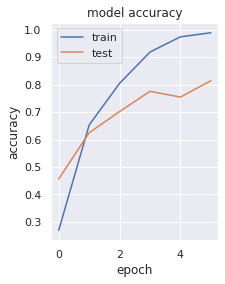

In [139]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

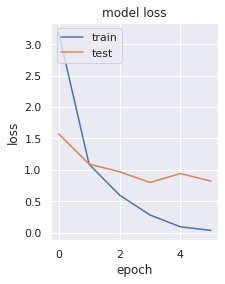

In [140]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The plots above show that as the training accuracy approaches 1.0 the model accuracy is around the 0.8 mark. The validation loss is quite high at 0.82. The early stopping halted the training after just 6 epochs. This has been observed to be accurate. In previous runs without early stopping implemented, the model loss began to rise after a validation accuracy of 0.8 was observed.

## Make a prediction

In [141]:
predict_x=cnn2.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)

9/9 [==============================] - 8s 825ms/step


In [142]:
y_pred

array([8, 9, 1, 4, 2, 2, 9, 4, 1, 7, 9, 1, 7, 8, 4, 4, 9, 7, 2, 9, 9, 9,
       3, 3, 5, 0, 1, 5, 9, 1, 1, 7, 2, 4, 9, 1, 9, 0, 0, 4, 1, 8, 9, 0,
       5, 6, 3, 5, 7, 7, 2, 0, 5, 6, 9, 1, 2, 2, 9, 6, 7, 7, 6, 4, 1, 8,
       0, 0, 5, 9, 2, 0, 5, 1, 1, 9, 1, 8, 2, 6, 7, 9, 1, 2, 0, 0, 5, 0,
       1, 3, 0, 2, 4, 4, 8, 5, 8, 1, 5, 7, 9, 1, 8, 8, 8, 7, 7, 4, 3, 1,
       1, 3, 6, 7, 9, 0, 3, 3, 7, 2, 3, 4, 7, 2, 3, 1, 9, 7, 1, 2, 7, 4,
       5, 4, 2, 3, 1, 0, 2, 9, 0, 7, 1, 0, 1, 3, 5, 0, 0, 4, 5, 6, 4, 1,
       9, 3, 3, 2, 6, 2, 0, 7, 0, 7, 1, 8, 1, 1, 2, 8, 5, 4, 7, 3, 9, 2,
       5, 8, 6, 0, 9, 3, 3, 1, 8, 4, 7, 0, 9, 4, 2, 4, 6, 3, 8, 6, 4, 0,
       3, 3, 8, 0, 5, 0, 0, 4, 6, 3, 1, 3, 0, 5, 3, 8, 7, 1, 2, 8, 8, 3,
       5, 0, 6, 7, 9, 7, 0, 7, 0, 3, 3, 9, 2, 2, 2, 7, 7, 8, 5, 4, 8, 0,
       1, 4, 4, 8, 4, 9, 0, 5, 8, 0, 8, 1, 9, 7, 1, 4, 9, 5, 5, 7, 3, 4,
       5, 6, 0, 3, 7, 5, 6, 9, 9, 4, 5, 0, 9, 8, 6, 4, 7, 3, 1, 2, 1])

In [143]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average = 'weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred, average = 'weighted'))
print("F1-score:",metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy: 0.8140350877192982
Precision: 0.8257572850118222
Recall: 0.8140350877192982
F1-score: 0.8142548516042079


The image classifier is now trained to **81.4%** accuracy on this dataset. This is a big improvement on the previous cnn model. 

**Display the classification report**

In [144]:
class_rep = classification_report(y_test, y_pred, target_names=name_of_birds)
print(class_rep)


                    precision    recall  f1-score   support

          COCKATOO       0.66      0.74      0.70        31
GANG GANG COCKATOO       0.72      0.79      0.75        33
            OSPREY       0.96      0.93      0.94        27
               EMU       0.62      0.72      0.67        25
        KOOKABURRA       0.93      0.90      0.92        30
       BUSH TURKEY       0.84      0.72      0.78        29
  RAINBOW LORIKEET       0.94      0.58      0.71        26
  REGENT BOWERBIRD       0.88      0.97      0.92        29
        BLACK SWAN       0.96      0.92      0.94        26
   SPOTTED CATBIRD       0.78      0.86      0.82        29

          accuracy                           0.81       285
         macro avg       0.83      0.81      0.81       285
      weighted avg       0.83      0.81      0.81       285



**Confusion matrix visualization with heatmap**

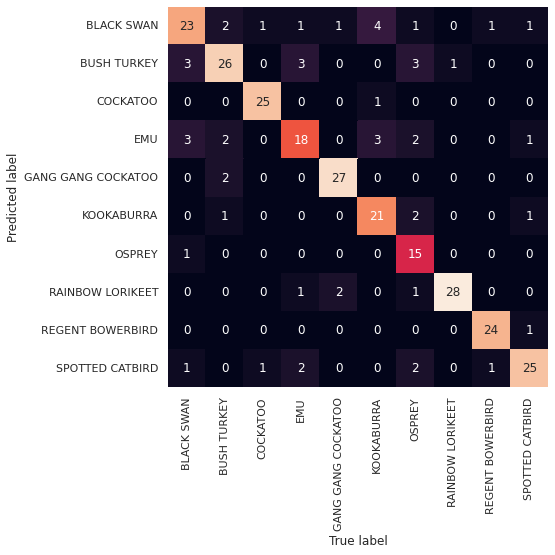

In [145]:


from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,7))

sns.heatmap(cm1.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=bird_list,
yticklabels=bird_list)
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

### Evaluation of cnn2,  8 layered CNN model.
Observing the accuracy score, This model had a very significant improvement from the basic model. 37.5% to 83.2%. There were only 48 miss predictions. This is a very significant improvement over all of the SVM and RFC models. The accuracy on the training set was 100% which is much better than the validation set and so it can be concluded that this model is still overfitted.

Another model was run with a 70/30 split of the training and test sets. It yieled an accuracy score of 77.8%

The model shown here will be the final model used to predict on the unseen validation set.

## C4 Display Misclassified images with Predicted Labels

Now the best performing model has been determined, with an accuracy score of 83.2% on the test set. There are still several missclassified predictions. A sample of them are shown below.

In [146]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, y_pred):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

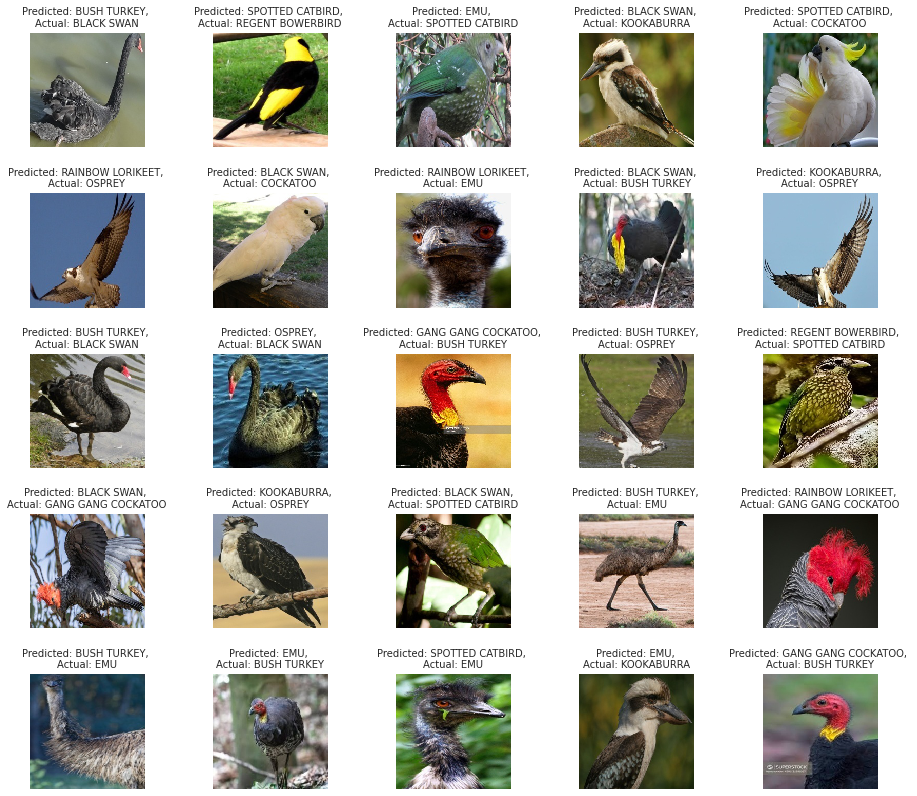

In [147]:
plt.figure(figsize=(15,15))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:25]):
    plt.subplot(5,5,plotIndex+1)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.8,
                    wspace=0.4,
                    hspace=0.4)
    plt.axis("off")
    plt.imshow(np.reshape(X_test[badIndex], (224,224,3)), interpolation='nearest')
    plt.title('Predicted: {}, \nActual: {}'.format(bird_list[y_pred[badIndex]], bird_list[y_test[badIndex]]), fontsize = 10)
plt.show()

Looking above at the misclassified predictions it can be seen that often birds with similar colours are often missclassified. For example, the black birds with some red on them like Black Swan, Gang Gang Cockatoo and Bush Turkeys are often missclassified. There are also several other exceptions depending on the background and lighting.

## C5 Make Predictions on Unseen Cases

The validation set will be used to predict 5 unseen images of each species. This is a truly independent test to verify the model's performance.

In [148]:
predict_val=cnn2.predict(validation_images_a) 
y_pred_val=np.argmax(predict_val,axis=1)

2/2 [==============================] - 2s 469ms/step


In [149]:
print("Accuracy:",metrics.accuracy_score(validation_target_idx_a, y_pred_val))
print("Precision:",metrics.precision_score(validation_target_idx_a, y_pred_val, average = 'weighted'))
print("Recall:",metrics.recall_score(validation_target_idx_a, y_pred_val, average = 'weighted'))
print("F1-score:",metrics.f1_score(validation_target_idx_a, y_pred_val, average = 'weighted'))

Accuracy: 0.8
Precision: 0.8164285714285714
Recall: 0.8
F1-score: 0.7907792207792208


The overall accuracy of predicting the unseen validation set is 80% This is in line with it's accuracy on the validation set during the model's training of 81.4%. The model is performing well on independendent data. A previous model that was trained over 50 epochs and that had an accuracy score of 82.8% was also tested on this unseen validation test. It also had an accuracy of 80% or 10 misclassified images. It was decided to use choose the model that had early stopping applied to it was not overfit to the same extent.

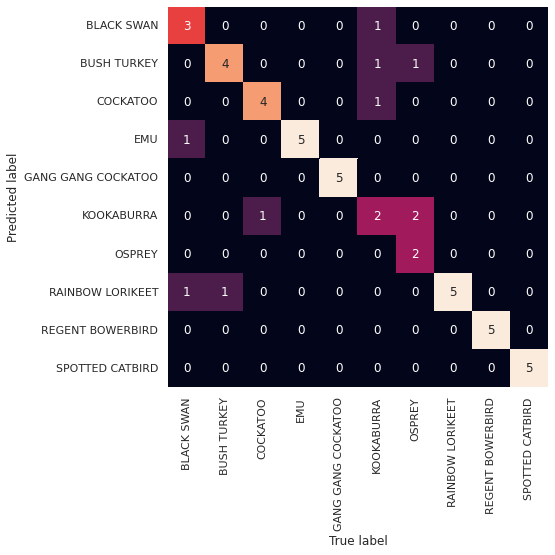

In [150]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(validation_target_idx_a, y_pred_val)

plt.figure(figsize=(7,7))

sns.heatmap(cm1.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=bird_list,
yticklabels=bird_list)
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

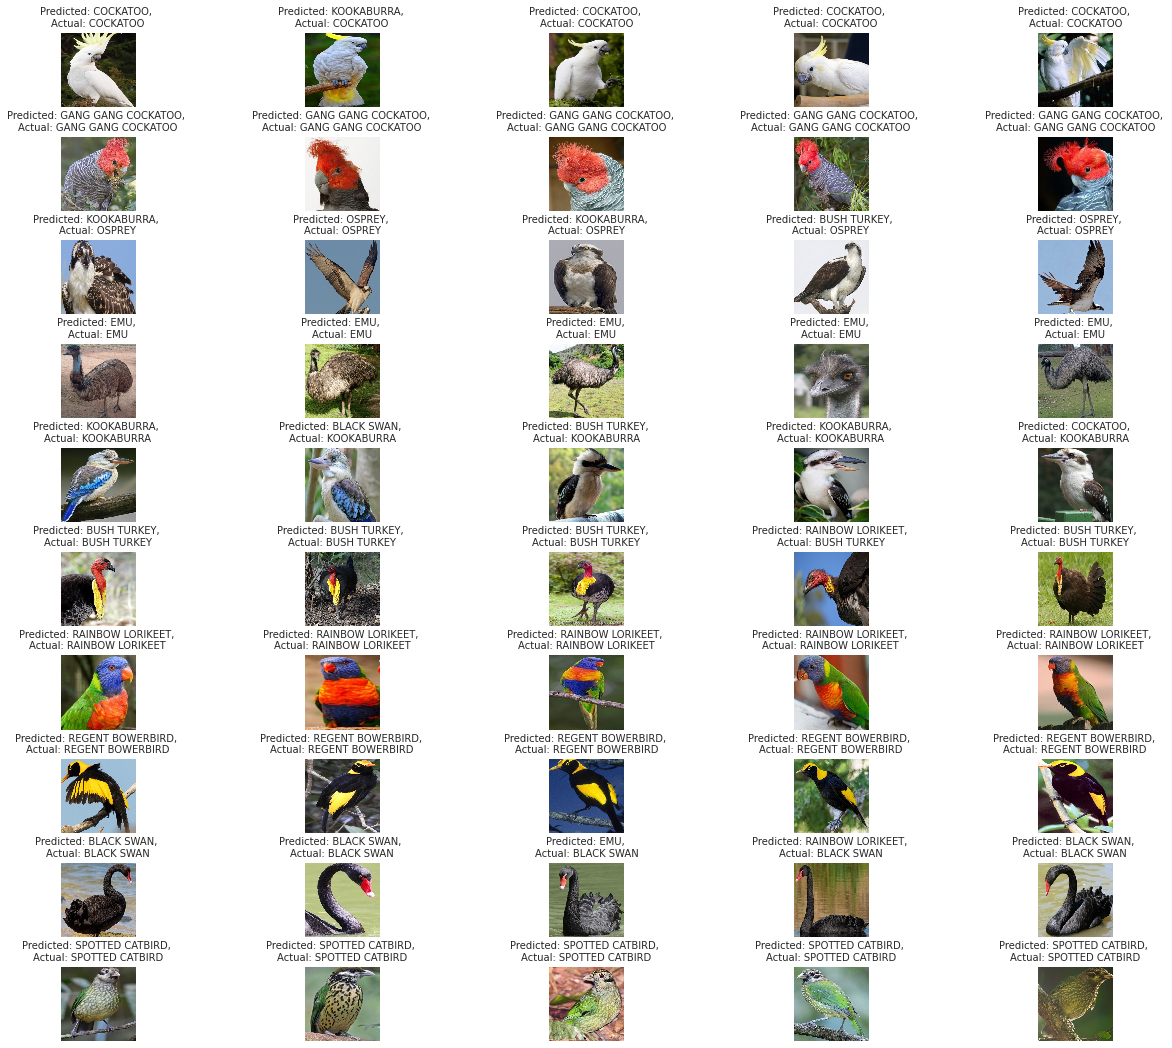

In [151]:
plt.figure(figsize=(20,20))
for idx in range(0,50):
  plt.subplot(10,5,idx+1)
  plt.subplots_adjust(left=0.1,
                  bottom=0.1,
                  right=0.9,
                  top=0.8,
                  wspace=0.4,
                  hspace=0.4)
  plt.axis("off")
  plt.imshow(np.reshape(validation_images[idx], (224,224,3)), interpolation='nearest')
  plt.title('Predicted: {}, \nActual: {}'.format(bird_list[y_pred_val[idx]], bird_list[validation_target_idx[idx]]), fontsize = 10)
plt.show()

80% of the validation images were predicted accurately, which is similar to the test set accuracy. All 50 of the validation images are shown above and the predicted classification is also labelled.

## C6 Create a Standalone Model on the entire Training Set

This has been done in the running of the previous models.

## C7 Ethical and Privacy Issues

There are not any major ethical concerns with image classification of birds. Taking images of humans and identifying them through algorithms has several ethical concerns, in particular invasion of privacy. However these do not apply to birds as it will not affect them at all. What the photographer must ensure however is that approaching birds (or other animals in their habitat is done ethically without causing any harm to the birds or the environment. In particular endangered species should not be approached, especially where they are nesting as this could result in them abandoning their nesting grounds for fear of their own safety.

## C8 Save the Model

The CNN model can saved with the following code.

In [ ]:
cnn2.save("cnn_2")

It can be easily reloaded again with the following code and used to run further predictions on new data as is done in step C5 above.

In [ ]:
cnn_2_reloaded = keras.models.load_model("cnn_2")

The SVM and Random Forest models can be pickled as a binary file in the working directory with the code shown below. The best model is stored as 'cnn_model'.

In [153]:
with open('svc_5', 'wb') as f:
    pickle.dump(svc_5,f)
    f.close()

This model can be easily be reimported again with the following code. This will save a lot of time and effort rather than having to create the model and wait for it to be fitted and tuned. 

In [ ]:
with open('cnn_model', 'rb') as f:
    cnn_2 = pickle.load(f)
    f.close()

The best way of improving any model is to add more good quality data samples to the dataset. In the case of this project, more images of birds can be obtained from online or through actual photography. They can be added to the original dataset and the whole process of tuning and improving the model can be repeated with a larger dataset. A quicker method is to use data augmentation techniques. This will be described in greater detail along with other options of improving model accuracy below in Further Work.

Also, additional unknown cases can be uploaded and the model can be run on them to predict their classification as was done above. 

## <span style="color: darkblue;">Conclusion</span>

Two configurations have been tried on the random forest model, five configurations have been applied to the support vector machine model and its dataset and two on cnn.  

The best model is clearly the CNN models. A more accurate result was obtained with a train-test ratio of 80/20.

The best SVM model which happens to be the last one evaluated has an overall accuracy of 68.2% at predicting the test data. It was found that to achieve the optimum performance of the model, the dataset had to be standardized so that all features have the same magnitude and standard deviation. Tuning the hyperparameters improved the performance of the default model by about 3% on the test dataset. PCA reduced the number of features from from 150528 to 1026 without any significant loss in accuracy. This will result in a reduction in processing time and complexity of the model. 

The disadvantage of the SVM model is that when conducting the grid search with several hyperparameter combinations, it can take a lot longer for the grid search to determine the best model. Although in this dataset, tuning the hyperparameters did not yield any improvement in the model's accuracy, it will result in improvements for tuning similar models. Standardizing the dataset will result in speeding up the processing time by a factor of three which is very significant for large datasets.

Time permitted for some variations in the CNN models. The best model had a linear stack of 8 layers including conv 2d, max pooling, flatten and dense with a total of 44,397,002 trainable parameters. Early stopping prevented it from additional overfitting. This model achieved an overall accuracy score of 81.4% on the test set and 80.0% on the unseen validation set.
This is a large improvement of accuracy by 15% over the best SVC and 20% over the best RFC. 

Another important feature of a model's performance is its tradeoff between bias and variance. Bias can be defined as the difference between the average prediction of a model and the actual correct value [13]. A model with high bias is underfit and will suffer from high inaccuracy in both the training and test data. Variance can be defined as the variability in a model's prediction for certain values in the training set. Models with high variance are overfit and will predict accurately on the training set but predict poorly on the test set. Models with high bias have low variance and vice versa. A good model should model the data well and have low bias and low variance.

In all models, high variance or overfitting was observed with cross-validation and in the test set. With progrssive models, the overfitting was reduced but it was still significant. More work will be done to address this issue on this dataset. In particular, the dataset needs to be oncreased significantly, preferably with additional images in the longer term or with data augmentation in the shorter term.

To summarise, the best model is the 8 layered CNN model with an 80/20 train-test split ratio.

## Further Work

This project has been extensive with over 12 different combinations of models, hyperparamter tuning through grid searches and dataset prepartion like feature selection and standardization have been tested. There is still a lot of work that can be done to improve the model some of the most important steps are listed below.

**Random Search**<br>
Another option that will be considered to improve the model's performance is a random search instead of a grid search. RandomizedSearchCV uses random combinations of hyperparameters to train a model and return the best scores as an output. Even though RandomizedSearchCV is almost like Grid Search, the key difference is that we do not need to input a set of possible values for all hyperparameters because a sampling distribution is defined for every hyperparameter to do a random search.[14]


**Improving CNN Performance**<br>
Much more work can be done on the CNN models to improve their performance. These include [15]:


1. Data augmentation<br>
Data augmentation is a process that involves increasing the dataset by modifying existing images so that they appear slightly different and can be used for the algorithm to learn from. Images can be rotated, flipped zoomed and cropped. This will greatly increase the size of the training dataset without having to spend time and effort acquiring new images. 

2. Acquistion of new images.<br> 
When time permits, acquiring new images is always preferential to improve accuracy rather than data augmentation. The more data the algorithm can use to learn from, the more accurate it will be. This should also help to reduce the problem with overfitting.

3. Parameter Tuning<br>
In particular increasing the number of epochs will improve the model's performance. This can be done through observation. Once it is observed that there is not any significant reduction in training loss nor improvement in accuracy, this will be a good limit so as not to overfit the model. As processing time on several thousand images can be lengthy, more time and a more powerful machine is required.
Different loss types can be used, for example categorical cross entropy. Different optimizers could also be tried including RMSprop, Adagrad or SGD.

4. Model Architecture<br>
As overfitting was obeserved, the model architecture should be modified, 
If the model is performing poorly on the training data and the test data then it may be underfitting. If this is the case then more layers may need to be added to the model's architecture. This will increase the number of features with which to fit the model. Caution must be taken not to add too many features which could result in overfitting.

5. Pretrained Neural Networks<br>
Use a pretrained neural network architecture such as ResNet-50. This network is 50 layers deep and has been pretrained on over a million images.

6. Standardization<br>
Standardization will scale the data so that all features have a mean value of 0 and one unit of standard deviation. This will result in all features being treated with equal weight hence improving the modelling process.



# <span style="color: darkblue;">References</span>

[1] J. Hey, Ph.D., “Why Should We Care about Species? | Learn Science at Scitable,” www.nature.com, 2009. https://www.nature.com/scitable/topicpage/why-should-we-care-about-species-4277923/

[2] P. D. Sharma, “PRML_Week12 - Lecture Convolutional Neural Networks,” https://researchprofiles.canberra.edu.au/en/persons/dharmendra-sharma-am-phd.

[3] H. Ritchie and M. Roser, “Biodiversity,” Our World in Data, Apr. 2021, [Online]. Available: https://ourworldindata.org/birds#:~:text=There%20are%20more%20than%2011%2C000

[4] GERRY, “BIRDS 400 - SPECIES IMAGE CLASSIFICATION,” www.kaggle.com. https://www.kaggle.com/datasets/gpiosenka/100-bird-species

[5] M. Xin and Y. Wang, “Research on image classification model based on deep convolution neural network,” EURASIP Journal on Image and Video Processing, vol. 2019, no. 1, Feb. 2019, doi: 10.1186/s13640-019-0417-8.

[6] A. Lamidi, “Breast Cancer Classification Using Support Vector Machine (SVM),” Medium, Nov. 27, 2018. https://towardsdatascience.com/breast-cancer-classification-using-support-vector-machine-svm-a510907d4878

[7] S. Sumbria, “Breast Cancer Diagnostic Dataset — EDA,” Analytics Vidhya, Feb. 17, 2021. https://medium.com/analytics-vidhya/breast-cancer-diagnostic-dataset-eda-fa0de80f15bd

[8] K. Praveen, “Bird Species Classification,” kaggle.com. https://www.kaggle.com/code/kathireshpraveen/bird-species-classification (accessed Oct. 22, 2022).

[9] J. Hou, “400 bird species CNN by Pytorch,” kaggle.com. https://www.kaggle.com/code/junehou/400-bird-species-cnn-by-pytorch (accessed Oct. 22, 2022).

[10] M. Simic, “Decision Trees vs. Random Forests | Baeldung on Computer Science,” www.baeldung.com, Mar. 08, 2022. https://www.baeldung.com/cs/decision-trees-vs-random-forests

[11] “sklearn.svm.SVC — scikit-learn 0.22 documentation,” Scikit-learn.org, 2019. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

[12] “Python Machine Learning Tutorial, Scikit-Learn: Wine Snob Edition,” EliteDataScience, Feb. 10, 2017. https://elitedatascience.com/python-machine-learning-tutorial-scikit-learn

[13] S. Singh, “Understanding the Bias-Variance Tradeoff,” Medium, May 21, 2018. https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

[14] S. Singh, “Using Random Search to Optimize Hyperparameters,” Engineering Education (EngEd) Program | Section, May 21, 2018. https://www.section.io/engineering-education/random-search-hyperparameters/

[15] D. Pawar, “Improving Performance of Convolutional Neural Network!,” Medium, Oct. 03, 2020. https://medium.com/@dipti.rohan.pawar/improving-performance-of-convolutional-neural-network-2ecfe0207de7